# Procesamiento de los datos
Se realiza el procesamiento de los datos en base a lo obtenido en el notebook de exploración de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import fisher_exact
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings

In [2]:
#Global variables in notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.simplefilter("ignore")
#Global variables in notebook
random_seed = 42
path_data = '../../data/raw/Base.csv'

In [3]:
data = pd.read_csv(path_data)
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


## Descripción de los datos

| **Columna**                               | **Tipo de dato**                    | **Descripción**                                                                                                           | **Rangos**               |
|-------------------------------------------|-----------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------|--------------------------|
| income                                    | Numérico                                      | Ingreso anual del solicitante (en forma de decil).                                                                                  | [0.1, 0.9]               |
| name_email_similarity                     | Numérico                                      | Métrica de similitud entre el correo electrónico y el nombre del solicitante. Valores más altos representan mayor similitud.        | [0, 1]                   |
| prev_address_months_count                 | Numérico                                      | Número de meses en la dirección anterior registrada del solicitante, es decir, la residencia anterior del solicitante, si aplica.    | [−1, 380]                |
| current_address_months_count              | Numérico                                      | Meses en la dirección registrada actual del solicitante.                                                                            | [−1, 429]                |
| customer_age                              | Numérico                                      | Edad del solicitante en años, redondeada a la década.                                                                               | [10, 90]                 |
| days_since_request                        | Numérico                                      | Número de días transcurridos desde que se realizó la solicitud.                                                                    | [0, 79]                  |
| intended_balcon_amount                    | Numérico                                      | Monto inicial transferido para la solicitud.                                                                                       | [−16, 114]               |
| payment_type                              | Categórico                                    | Tipo de plan de pago de crédito. 5 valores posibles (anonimizados).                                                                  | -                        |
| zip_count_4w                              | Numérico                                      | Número de solicitudes dentro del mismo código postal en las últimas 4 semanas.                                                     | [1, 6830]                |
| velocity_6h                               | Numérico                                      | Velocidad de las aplicaciones totales realizadas en las últimas 6 horas, es decir, el número promedio de solicitudes por hora.      | [−175, 16818]            |
| velocity_24h                              | Numérico                                      | Velocidad de las aplicaciones totales realizadas en las últimas 24 horas, es decir, el número promedio de solicitudes por hora.     | [1297, 9586]             |
| velocity_4w                               | Numérico                                      | Velocidad de las aplicaciones totales realizadas en las últimas 4 semanas, es decir, el número promedio de solicitudes por hora.    | [2825, 7020]             |
| bank_branch_count_8w                      | Numérico                                      | Número total de solicitudes en la sucursal bancaria seleccionada en las últimas 8 semanas.                                         | [0, 2404]                |
| date_of_birth_distinct_emails_4w          | Numérico                                      | Número de correos electrónicos de solicitantes con la misma fecha de nacimiento en las últimas 4 semanas.                           | [0, 39]                  |
| employment_status                         | Categórico                                    | Estado de empleo del solicitante. 7 valores posibles (anonimizados).                                                                | -                        |
| credit_risk_score                         | Numérico                                      | Puntuación interna de riesgo de la solicitud.                                                                                       | [−191, 389]              |
| email_is_free                             | Binario                                       | Dominio del correo electrónico de la solicitud (ya sea gratuito o de pago).                                                          | -                        |
| housing_status                            | Categórico                                    | Estado residencial actual del solicitante. 7 valores posibles (anonimizados).                                                      | -                        |
| phone_home_valid                          | Binario                                       | Validez del teléfono fijo proporcionado.                                                                                            | -                        |
| phone_mobile_valid                        | Binario                                       | Validez del teléfono móvil proporcionado.                                                                                            | -                        |
| bank_months_count                         | Numérico                                      | Cuántos meses tiene la cuenta anterior (si la tiene).                                                                               | [−1, 32]                 |
| has_other_cards                           | Binario                                       | Si el solicitante tiene otras tarjetas de la misma entidad bancaria.                                                               | -                        |
| proposed_credit_limit                     | Numérico                                      | Límite de crédito propuesto para el solicitante.                                                                                   | [200, 2000]              |
| foreign_request                           | Binario                                       | Si el país de origen de la solicitud es diferente al del banco.                                                                     | -                        |
| source                                    | Categórico                                    | Fuente en línea de la solicitud. Ya sea navegador (INTERNET) o aplicación (TELEAPP).                                                  | -                        |
| session_length_in_minutes                 | Numérico                                      | Duración de la sesión del usuario en el sitio web bancario en minutos.                                                              | [−1, 107]                |
| device_os                                 | Categórico                                    | Sistema operativo del dispositivo que realizó la solicitud. Los valores posibles son: Windows, macOS, Linux, X11, u otro.            | -                        |
| keep_alive_session                        | Binario                                       | Opción del usuario sobre el cierre de sesión.                                                                                       | -                        |
| device_distinct_emails_8w                 | Numérico                                      | Número de correos electrónicos distintos en el sitio web bancario desde el dispositivo utilizado en las últimas 8 semanas.            | [−1, 2]                  |
| device_fraud_count                        | Numérico                                      | Número de solicitudes fraudulentas con el dispositivo utilizado.                                                                    | [0, 1]                   |
| month                                     | Numérico                                      | Mes en el que se realizó la solicitud.                                                                                              | [0, 7]                   |
| fraud_bool                                | Binario                                       | Si la solicitud es fraudulenta o no.                                                                                                | -                        |


In [4]:
numerical_columns = ['device_fraud_count','income','name_email_similarity','prev_address_months_count','current_address_months_count','customer_age','days_since_request','intended_balcon_amount','zip_count_4w','velocity_6h','velocity_24h','velocity_4w','bank_branch_count_8w','date_of_birth_distinct_emails_4w','credit_risk_score','bank_months_count','proposed_credit_limit','session_length_in_minutes','device_distinct_emails_8w','month']
categorical_columns = ['payment_type','employment_status','email_is_free','housing_status','phone_home_valid','phone_mobile_valid','has_other_cards','foreign_request','source','device_os','keep_alive_session','fraud_bool']
target_var = 'fraud_bool'

## Valores faltantes y duplicados

##### Como se observo en la exploración de los datos se puedo observar que no existen datos duplicados, si existen valores perdidos pero tienen una relación directa con el fraude de una cuenta bancaria, por lo que se toma la decisión de eliminar solo los que no tienen una relación directa con la variable objetivo

In [5]:
data = data[(data[['device_distinct_emails_8w', 'session_length_in_minutes', 'current_address_months_count',"credit_risk_score"]] >= 0).all(axis=1)]
data.reset_index(drop=True, inplace=True)

In [6]:
data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979235,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,6732.602414,3010.048099,3095.754245,42,8,CA,305,1,BB,1,1,31,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
979236,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,1574.293294,2716.495767,4286.089050,0,5,CA,235,0,BA,1,1,-1,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
979237,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,1258.864938,3601.322892,3103.891664,2,3,CA,195,1,BE,0,1,31,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
979238,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,7048.137128,6521.395012,3068.265084,7,8,CA,148,0,BD,0,1,1,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


## Outliers
### Método del Rango Intercuartílico (IQR)

El Método del Rango Intercuartílico (IQR) es una técnica comúnmente utilizada para identificar y manejar los valores atípicos (outliers) en un conjunto de datos. El IQR se basa en el rango entre el primer cuartil (Q1) y el tercer cuartil (Q3), es decir, el 25% y el 75% de los datos, respectivamente. Esto es comun cuando los datos no siguen una distribución normal como se vio en las etapas anteriores

In [7]:
def detectar_outliers_var(df,input_columns,k=1.5):
    outliers = pd.DataFrame(columns=df.columns)
    
    for col in input_columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - k * IQR
            limite_superior = Q3 + k * IQR
            outliers_col = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
            outliers = pd.concat([outliers, outliers_col], axis=0)
    
    return outliers.drop_duplicates()


def eliminar_outliers_iqr_multi(df, columns, k=1.5):
    df_filtrado = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        # Filtrar filas que no son outliers en la columna actual
        df_filtrado = df_filtrado[(df_filtrado[column] >= lower_bound) & (df_filtrado[column] <= upper_bound)]
    
    return df_filtrado

def plot_outliers(df,columns):
    plt.figure(figsize=(20, 16))

    # Crear un boxplot para cada columna numérica
    for i, col in enumerate(columns):
        plt.subplot(5, 4, i + 1)  # Organizar en 5 filas y 4 columnas
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.tight_layout()

    plt.show()

def bivariante_boxplot_numerical(df,target_var):
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(22, 20))
    columns = df.columns.to_list()
    columns.remove(target_var)

    for i, feature in  enumerate(columns):
        ax = axes[i // 4][i % 4]
        sns.boxplot(data=df, x=target_var, y=feature, ax=ax, boxprops=dict(alpha=.6))
        ax.set_xlabel('')
        ax.set_ylabel(feature)
        ax.set_xticklabels(['Not Fraud', 'Fraud'])

    plt.tight_layout()
    plt.show()

def bivariante_graphs_numerical(df, target_var):
    columns = df.columns.to_list()
    columns.remove(target_var)
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

    fig.suptitle('Distribución de características numéricas según el estado de fraude')

    for i, feature in enumerate(columns):
        ax = axes[i // 4][i % 4]
        sns.kdeplot(data=df[df[target_var] == 0][feature], fill=True, ax=ax, label='Not Fraud')
        sns.kdeplot(data=df[df[target_var] == 1][feature], fill=True, ax=ax, label='Fraud')
        ax.set_xlabel(feature)
        ax.legend()

    plt.tight_layout()
    plt.show()

def bivariante_graphs_categorial(df, target):
    sns.set(font_scale=1)
    col_analysis = df.columns.to_list()
    col_analysis.remove(target)
    num_subplots = len(col_analysis)
    fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 6 * num_subplots))
    for i, col in enumerate(col_analysis):
        sns.countplot(data=df, x=col, ax=axes[i], hue=target, order=df[col].value_counts().index)
        ax = axes[i]
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

        ax.set_title(f'Gráfico de Barras Apiladas para {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Conteo')
    plt.tight_layout()
    plt.show()

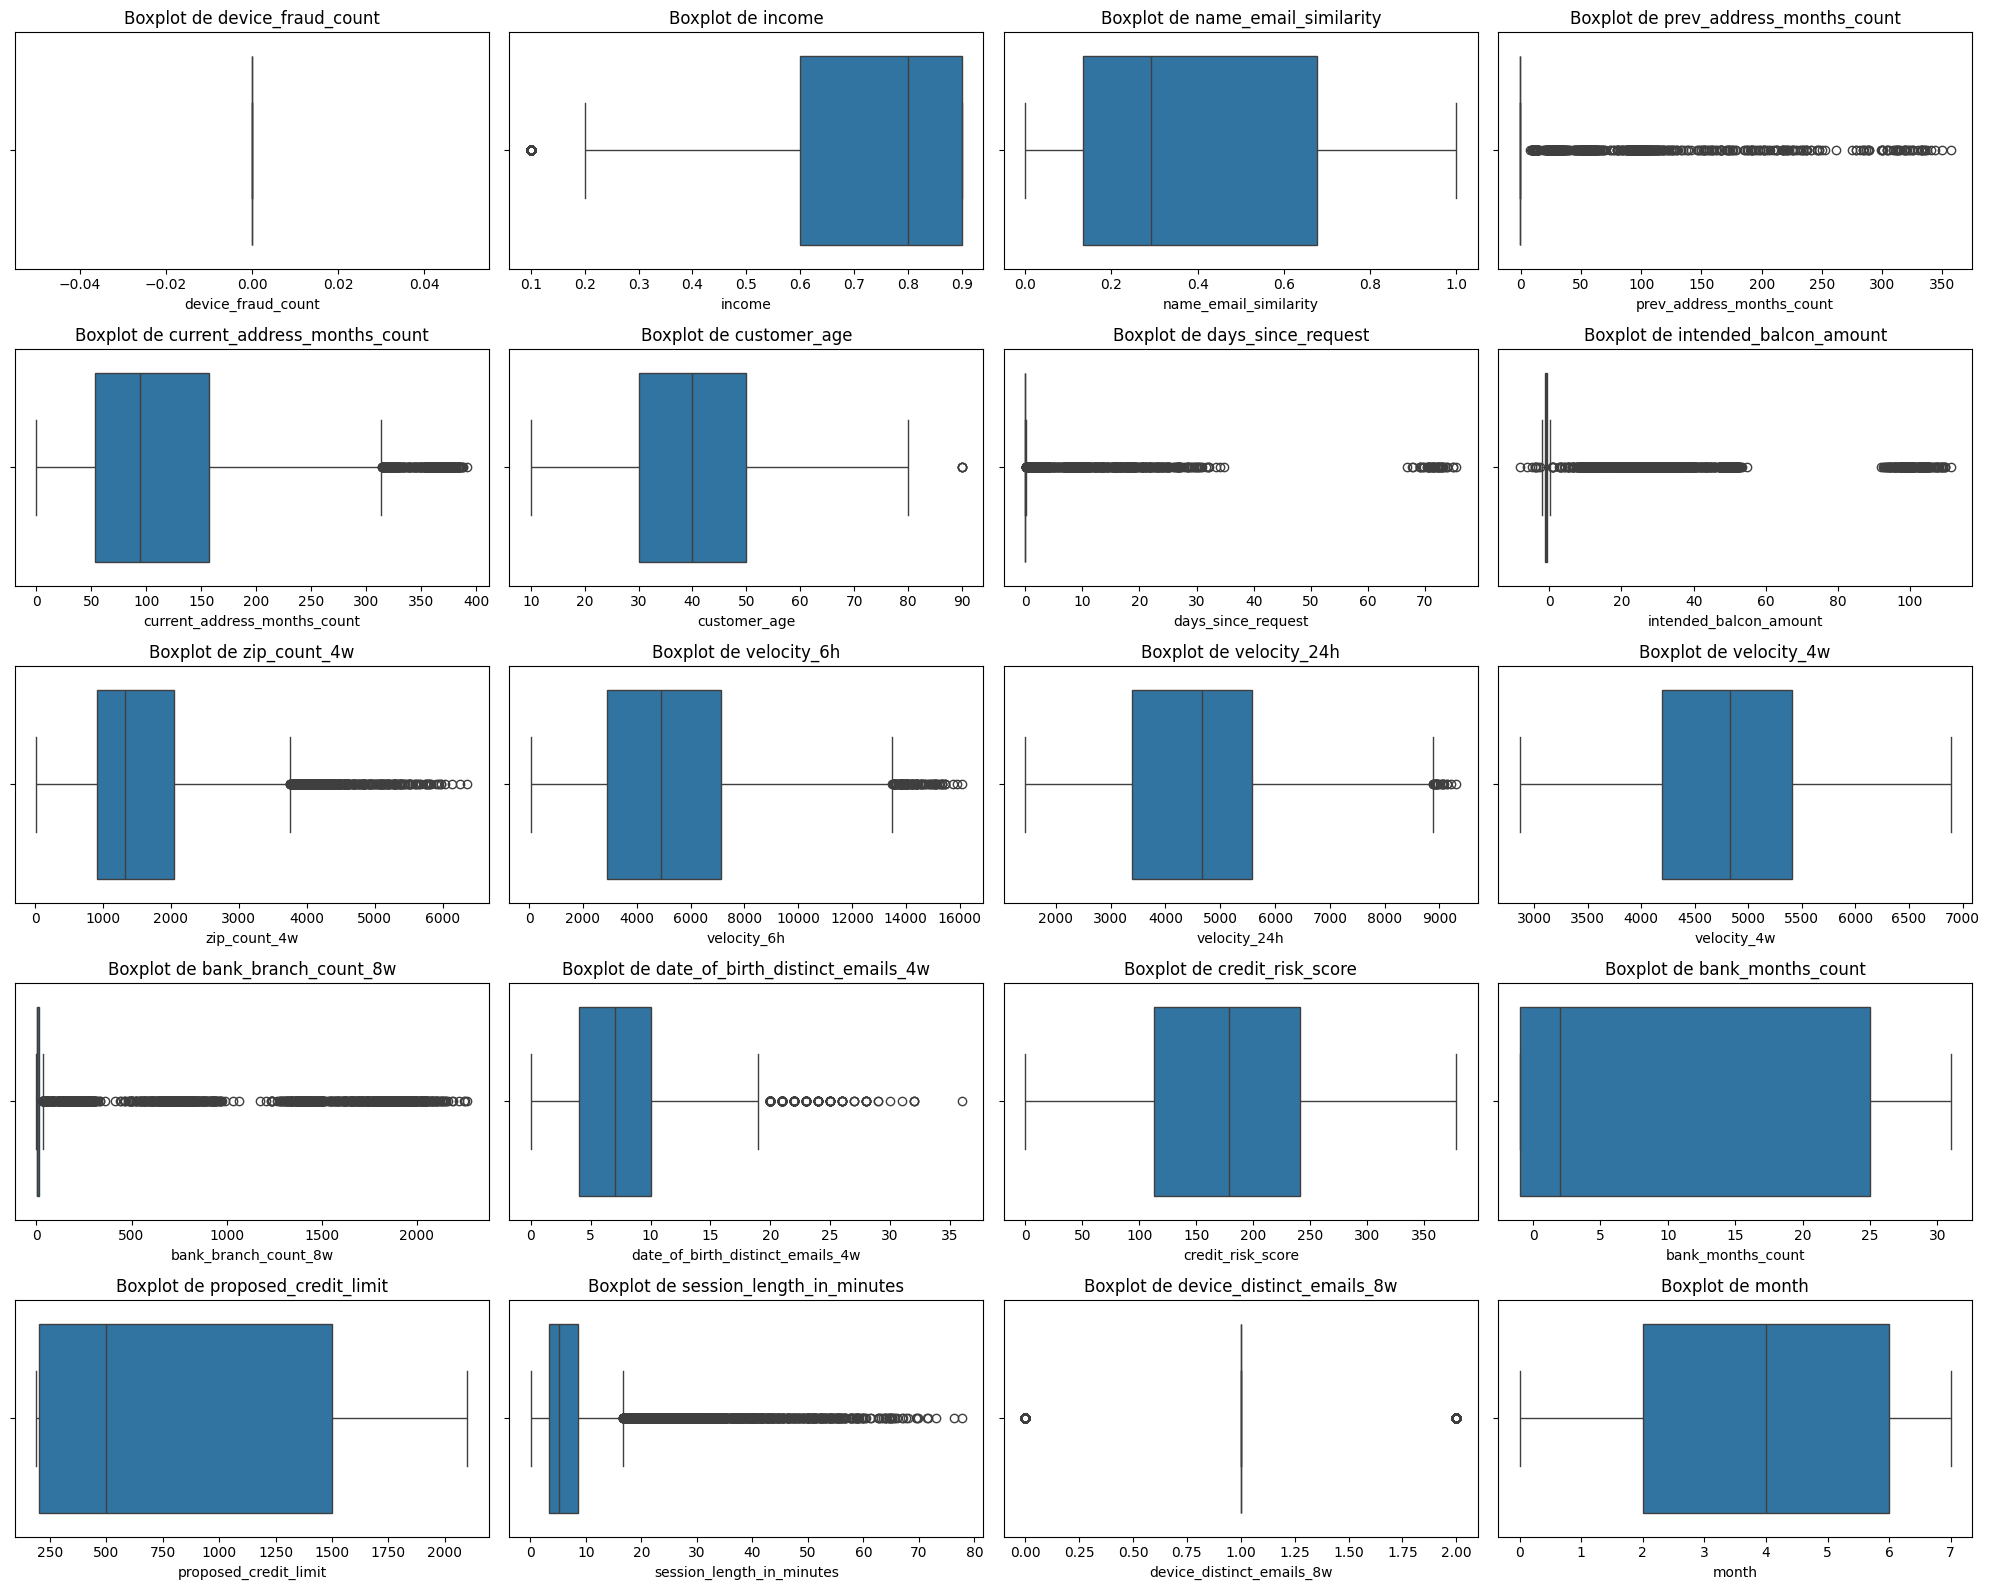

In [8]:
# Definir el tamaño de la figura para ajustarse a todos los boxplots
data_is_fraud = data[data[target_var]==1]
plot_outliers(data_is_fraud,numerical_columns)

In [9]:
##Detectar outliers por la clasificación fraude
outliers_fraud = detectar_outliers_var(df=data_is_fraud, input_columns=numerical_columns,k=2)
outliers_fraud.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
548,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,6883.814598,3655.042385,4327.215795,16,12,CA,273,1,BA,0,1,1,1,2000.0,0,INTERNET,44.536211,windows,0,1,0,0
3198,1,0.9,0.888855,253,3,40,0.003099,-1.061991,AC,1391,3115.724046,5186.475902,6433.414779,0,10,CD,123,1,BB,0,0,-1,0,200.0,0,INTERNET,11.726755,windows,0,1,0,0
5365,1,0.9,0.057550,90,147,30,3.109056,-1.550719,AC,4220,6495.694547,3986.383676,5859.181721,0,18,CA,10,1,BA,0,1,-1,0,200.0,0,INTERNET,1.650819,windows,0,1,0,0
5723,1,0.6,0.739517,189,61,50,0.013636,-1.133785,AC,2687,7126.746914,4677.302988,5948.206800,1,5,CA,93,1,BC,0,1,-1,0,200.0,0,INTERNET,11.280720,linux,0,1,0,0
6427,1,0.9,0.507907,56,5,20,0.017471,-1.937428,AC,1092,8860.578438,7095.300819,6734.156642,0,13,CA,61,1,BC,0,1,-1,0,200.0,0,INTERNET,9.750289,linux,1,1,0,0


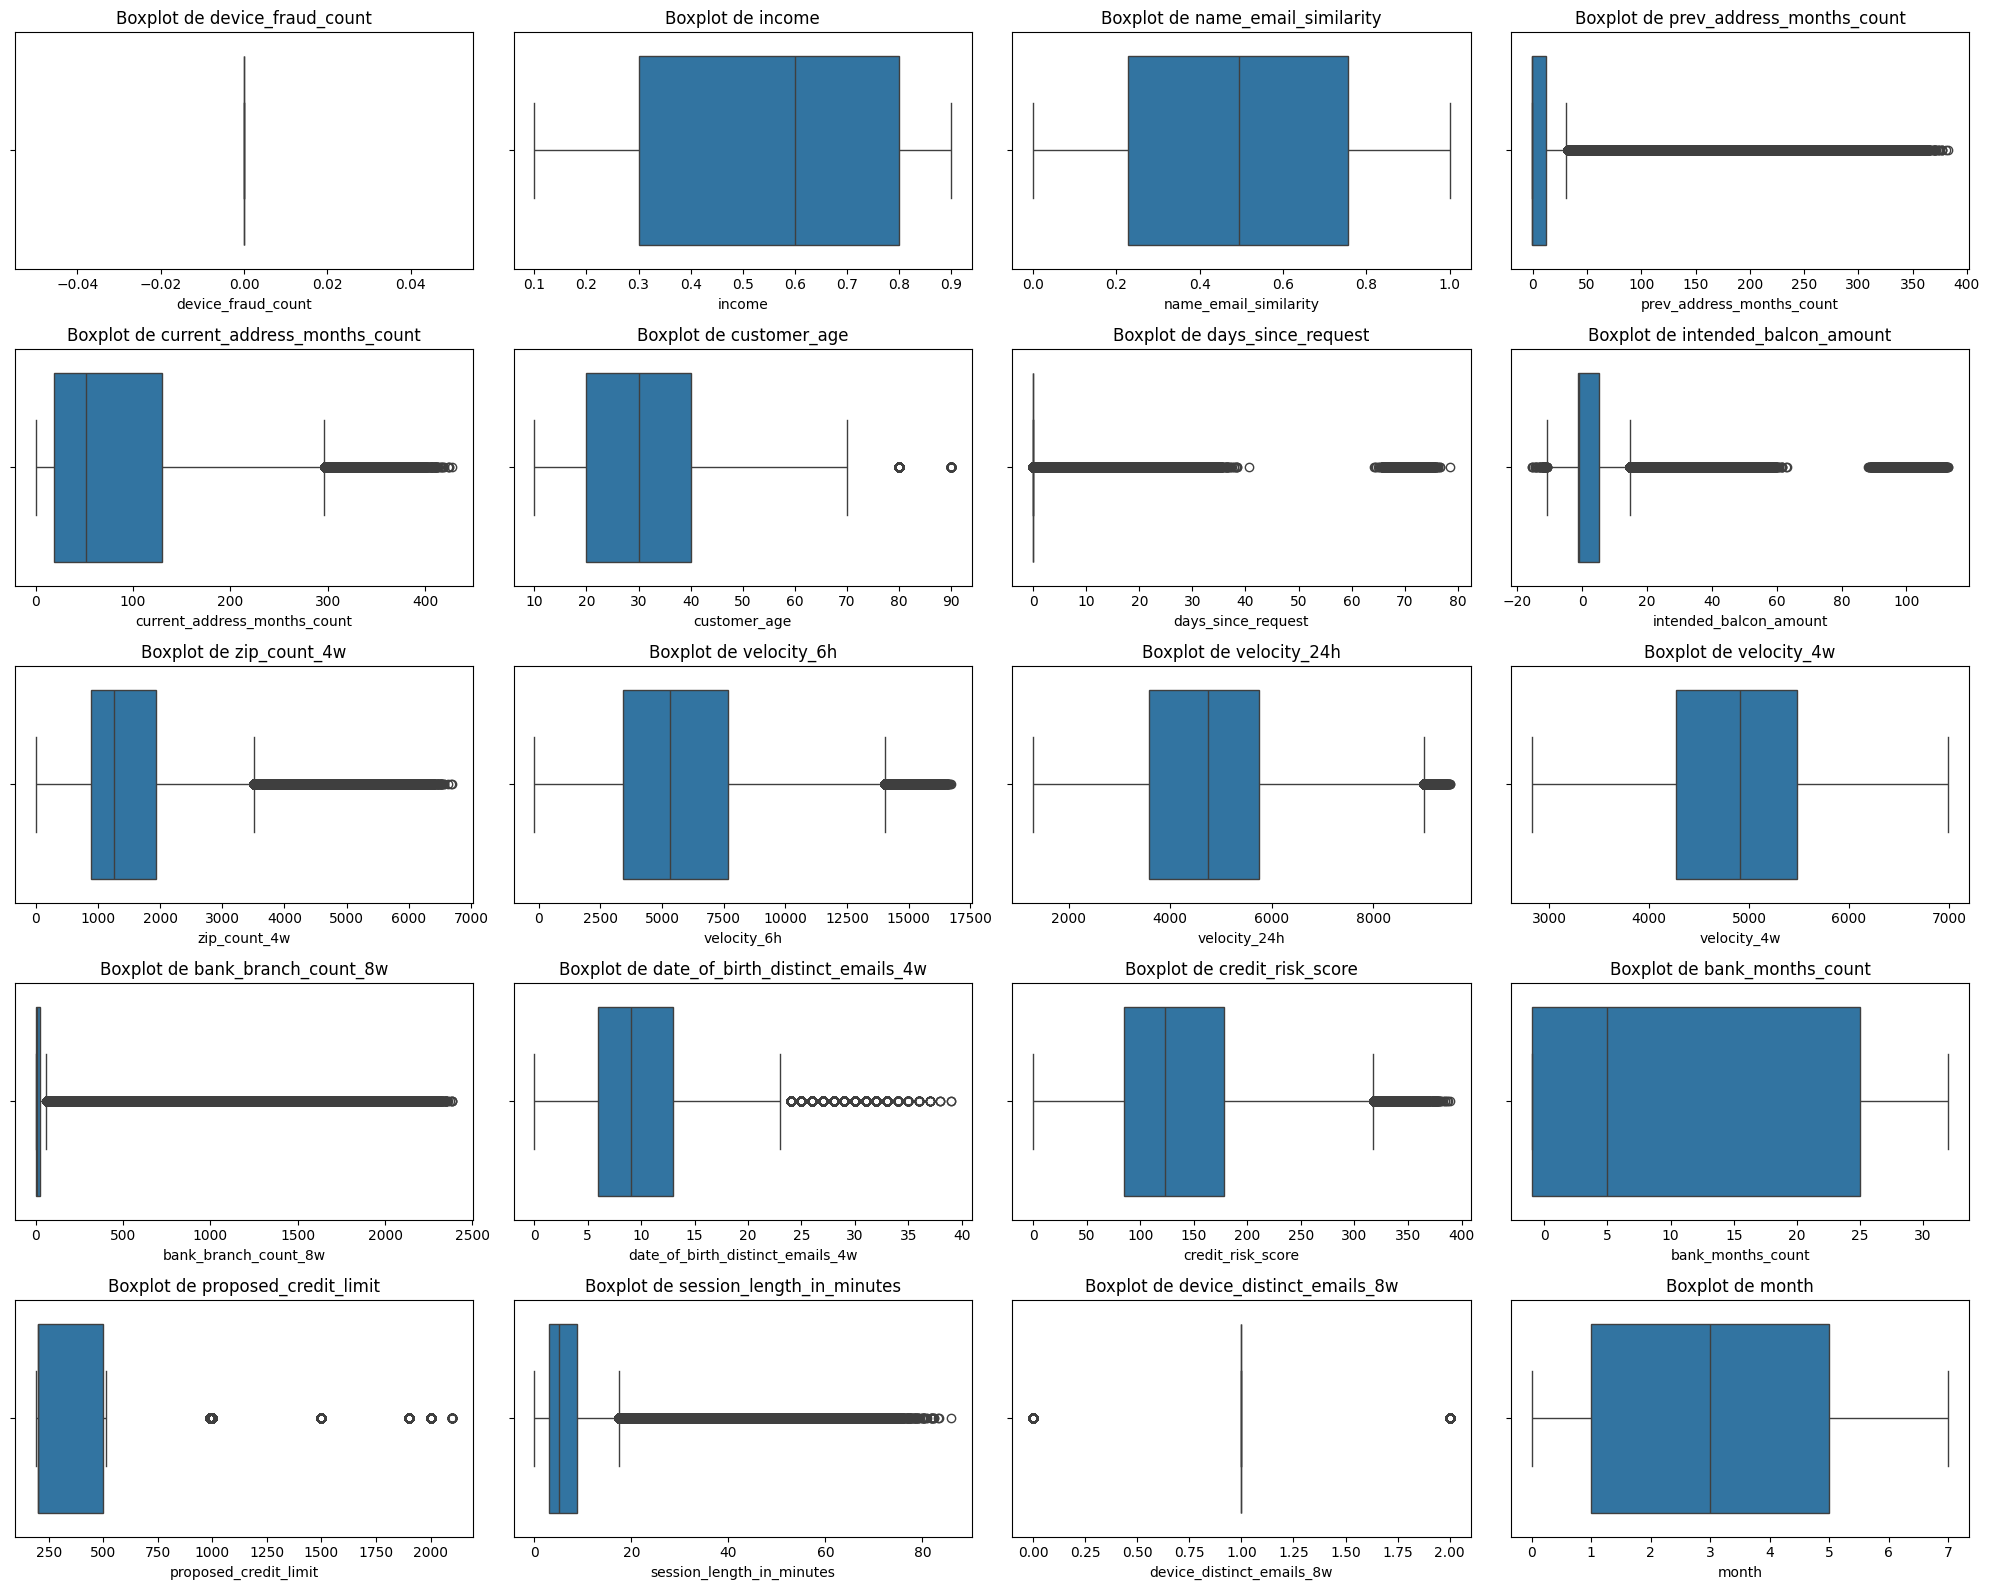

In [10]:
##Detectar outliers por la clasificación no es fraude
data_is_not_fraud = data[data[target_var]==0]
plot_outliers(data_is_not_fraud,numerical_columns)

In [11]:
outliers_not_fraud = detectar_outliers_var(df=data_is_not_fraud, input_columns=numerical_columns,k=2)
outliers_not_fraud.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
37,0,0.6,0.772867,96,124,40,0.015487,-0.959755,AB,4033,7412.064391,5990.690677,6373.249653,0,3,CB,245,0,BA,0,1,28,0,1500.0,0,INTERNET,4.607511,other,1,1,0,0
39,0,0.6,0.030694,48,5,20,0.008314,-0.793166,AB,3601,9482.529231,5369.544378,6373.368036,5,16,CA,142,1,BE,1,1,20,0,500.0,0,INTERNET,3.101606,linux,1,1,0,0
40,0,0.9,0.160079,49,8,20,0.032588,100.669891,AD,587,7942.408980,6873.953008,6830.890289,25,11,CA,114,1,BC,0,1,1,0,500.0,0,INTERNET,14.026596,windows,1,1,0,0
41,0,0.4,0.523423,51,19,20,0.011945,-1.036585,AD,1290,7222.840840,5844.032110,6749.432652,9,22,CA,39,1,BC,1,1,1,0,200.0,0,INTERNET,4.987669,linux,1,1,0,0
51,0,0.7,0.851319,235,29,30,6.909344,13.017865,AA,3659,8023.618319,6968.212492,4990.838362,236,23,CA,18,1,BC,0,1,11,0,1000.0,0,INTERNET,3.885405,linux,1,1,0,0


In [12]:
all_outliers =  pd.concat([outliers_fraud, outliers_not_fraud], ignore_index=True)
all_outliers

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,6883.814598,3655.042385,4327.215795,16,12,CA,273,1,BA,0,1,1,1,2000.0,0,INTERNET,44.536211,windows,0,1,0,0
1,1,0.9,0.888855,253,3,40,0.003099,-1.061991,AC,1391,3115.724046,5186.475902,6433.414779,0,10,CD,123,1,BB,0,0,-1,0,200.0,0,INTERNET,11.726755,windows,0,1,0,0
2,1,0.9,0.057550,90,147,30,3.109056,-1.550719,AC,4220,6495.694547,3986.383676,5859.181721,0,18,CA,10,1,BA,0,1,-1,0,200.0,0,INTERNET,1.650819,windows,0,1,0,0
3,1,0.6,0.739517,189,61,50,0.013636,-1.133785,AC,2687,7126.746914,4677.302988,5948.206800,1,5,CA,93,1,BC,0,1,-1,0,200.0,0,INTERNET,11.280720,linux,0,1,0,0
4,1,0.9,0.507907,56,5,20,0.017471,-1.937428,AC,1092,8860.578438,7095.300819,6734.156642,0,13,CA,61,1,BC,0,1,-1,0,200.0,0,INTERNET,9.750289,linux,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590995,0,0.1,0.234492,31,5,20,0.005898,-1.063695,AB,1770,2312.897138,2138.892526,3049.759711,12,25,CA,55,1,BC,0,1,1,0,200.0,0,INTERNET,10.954656,linux,0,2,0,7
590996,0,0.7,0.533574,30,0,30,0.030628,-1.439334,AD,1414,8060.858277,7642.798539,3093.820558,9,5,CD,22,0,BC,0,1,20,0,200.0,0,INTERNET,7.693720,linux,0,2,0,7
590997,0,0.8,0.530861,-1,211,60,0.028570,-1.587900,AC,1229,1989.004455,2862.092067,3117.978126,0,5,CA,116,0,BA,1,1,-1,1,500.0,0,INTERNET,3.818632,other,0,0,0,7
590998,0,0.9,0.372724,-1,154,50,0.017658,-1.035556,AB,1096,3742.068578,3040.316943,3127.945268,12,6,CA,127,0,BB,0,1,1,0,200.0,0,INTERNET,16.714086,linux,1,2,0,7


##### Conclusión
Se toma el valor de `k=2` ya que es una buena opción al ofrecer un equilibrio entre la eliminación de outliers pero se observa que la cantidad de outliers a eliminar es significativa para la clase minoritaria por lo que se opta por dejar los datos con outliers al tener una gran cantidad de datos desbalanceados

## Codificación de variables

In [13]:
from sklearn.preprocessing import OneHotEncoder

### Codificación de las variables categoricas
Se codifican las variables categoticas para la selección de las variables con el objetivo de aplicar NearMiss, para ello se usa `OneHotEncoder` para variables categóricas sin orden (nominales), como colores, nombres de ciudades o tipos de productos. En estos casos, no hay una relación de mayor o menor entre las categorías.

In [14]:
import os
from joblib import load, dump

In [15]:
categorical_features = [x for x in data.columns if data[x].dtypes == "O"]
categorical_features

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [16]:
path_one_code_encoder = '../../models/one_hot_enconder.pkl'

data_encoding = data.copy()
encoder = None
# Inicializar OneHotEncoder
if os.path.isfile(path_one_code_encoder):
    encoder = load(path_one_code_encoder)
else:
    encoder = OneHotEncoder(sparse_output=False, dtype=int)
    encoder.fit(data_encoding[categorical_features])
    dump(encoder,path_one_code_encoder)

encoded_array = encoder.transform(data_encoding[categorical_features])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))
encoded_df

,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979235,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
979236,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
979237,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
979238,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [17]:
categorical_columns_encoded = encoded_df.columns.to_list()
data_encoding.drop(columns=categorical_features, inplace=True)
data_encoding[encoded_df.columns] = encoded_df[encoded_df.columns]
data_encoding

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9,0,1500.0,0,16.224843,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2,0,1500.0,0,3.363854,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30,0,200.0,0,22.730559,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1,0,200.0,0,15.215816,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26,0,200.0,0,3.743048,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979235,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,530,6732.602414,3010.048099,3095.754245,42,8,305,1,1,1,31,0,1500.0,0,16.967770,0,1,0,7,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
979236,0,0.9,0.824544,-1,193,30,0.009591,0.008307,408,1574.293294,2716.495767,4286.089050,0,5,235,0,1,1,-1,1,1000.0,0,1.504109,0,1,0,7,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
979237,0,0.8,0.140891,-1,202,10,0.059287,50.609995,749,1258.864938,3601.322892,3103.891664,2,3,195,1,0,1,31,0,200.0,0,16.068595,0,1,0,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
979238,0,0.9,0.002480,52,3,30,0.023357,-1.313387,707,7048.137128,6521.395012,3068.265084,7,8,148,0,0,1,1,0,200.0,0,1.378683,1,1,0,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


### Codificación de las variables binarias
En este caso no es necesario realizar una conversión de variables binarias pues las variables ya estan convertidas en numericas en el propio dataset. 

##### Conclusión
Se han codificado las variables categoricas usando OneHotEncoder y en el caso de las variables binarias no es necesario realizar el proceso

## Normalización de los datos
Se normliza los datos para las variables de tipo númericas para realizar una selección de caracteristicas

In [18]:
from sklearn.preprocessing import RobustScaler

In [19]:
path_robust_escaler = '../../models/robust_escaler.pkl'

data_feature_selection = data_encoding.copy()

scaler = None

if os.path.isfile(path_robust_escaler):
    scaler = load(path_robust_escaler)
else:
    scaler = RobustScaler()
    scaler.fit(data_feature_selection[numerical_columns])
    dump(scaler,path_robust_escaler)

data_feature_selection[numerical_columns] = scaler.transform(data_feature_selection[numerical_columns])
data_feature_selection

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,-0.6,0.931607,0.000000,-0.245455,0.5,-0.440576,18.685050,-0.192161,1.834393,1.436309,1.508179,-0.166667,-0.571429,0.414894,1,0,1,0.153846,0,4.193548,0,1.934382,1,0.0,0.0,-0.75,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0,0.4,0.236273,0.000000,0.336364,-0.5,-0.264113,-0.003323,0.380497,0.921561,0.462896,0.850154,-0.250000,1.285714,0.319149,1,1,1,-0.115385,0,4.193548,0,-0.304572,1,0.0,0.0,-0.75,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0.4,0.950824,0.769231,-0.345455,0.5,-0.147446,-0.119255,-0.157744,-0.198470,0.336574,0.891991,0.250000,0.285714,-0.372340,1,0,1,0.961538,0,0.000000,0,3.066954,0,0.0,0.0,-0.75,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0.0,-0.031863,0.923077,-0.345455,0.0,-0.427159,-0.186682,2.125239,2.149286,0.929837,0.873725,0.083333,0.571429,-0.361702,1,0,1,-0.153846,0,0.000000,0,1.758721,1,0.0,0.0,-0.75,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,0,0.6,0.659940,0.000000,-0.209091,0.5,300.826381,8.680625,1.031549,0.539300,0.175729,0.849389,-0.333333,-0.428571,-0.351064,0,1,1,0.807692,0,0.000000,0,-0.238559,0,0.0,0.0,-0.75,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979235,0,0.4,-0.692022,0.000000,0.827273,0.0,1.902642,0.000895,-0.697897,0.334492,-0.801518,-1.489482,1.375000,-0.142857,1.925532,1,1,1,1.000000,0,4.193548,0,2.063717,0,0.0,0.0,1.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
979236,0,0.6,0.626476,0.000000,1.281818,0.0,-0.290598,0.151871,-0.814532,-0.881353,-0.937220,-0.510903,-0.375000,-0.571429,1.180851,0,1,1,-0.230769,1,2.580645,0,-0.628333,0,0.0,0.0,1.00,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
979237,0,0.4,-0.661500,0.000000,1.363636,-1.0,2.319607,9.306114,-0.488528,-0.955701,-0.528187,-1.482793,-0.291667,-0.857143,0.755319,1,0,1,1.000000,0,0.000000,0,1.907181,0,0.0,0.0,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
979238,0,0.6,-0.922261,4.076923,-0.445455,0.0,0.432452,-0.087234,-0.528681,0.408866,0.821688,-1.512081,-0.083333,-0.142857,0.255319,0,0,1,-0.153846,0,0.000000,0,-0.650168,1,0.0,0.0,1.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


## Selección de caracteristicas
Se realiza los test estadisticos para las diferentes variables con el objetivo de medir la relación entre las variables categoricas y numericas respecto a la variable objetivo.

### Eliminación de caracteristicas
La caracteristica que no posee variación en su valor y permanece constantes con un valor de 0 es la variable device_fraud_count por lo que se va a eliminar debido a que no aporta nada en el analisis

In [20]:
data_feature_selection['device_distinct_emails_8w'].value_counts()

device_distinct_emails_8w
 0.0    949786
 1.0     24455
-1.0      4999
Name: count, dtype: int64

In [21]:
data_feature_selection['device_fraud_count'].value_counts()

device_fraud_count
0.0    979240
Name: count, dtype: int64

In [22]:
data_feature_selection

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,-0.6,0.931607,0.000000,-0.245455,0.5,-0.440576,18.685050,-0.192161,1.834393,1.436309,1.508179,-0.166667,-0.571429,0.414894,1,0,1,0.153846,0,4.193548,0,1.934382,1,0.0,0.0,-0.75,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0,0.4,0.236273,0.000000,0.336364,-0.5,-0.264113,-0.003323,0.380497,0.921561,0.462896,0.850154,-0.250000,1.285714,0.319149,1,1,1,-0.115385,0,4.193548,0,-0.304572,1,0.0,0.0,-0.75,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0.4,0.950824,0.769231,-0.345455,0.5,-0.147446,-0.119255,-0.157744,-0.198470,0.336574,0.891991,0.250000,0.285714,-0.372340,1,0,1,0.961538,0,0.000000,0,3.066954,0,0.0,0.0,-0.75,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0.0,-0.031863,0.923077,-0.345455,0.0,-0.427159,-0.186682,2.125239,2.149286,0.929837,0.873725,0.083333,0.571429,-0.361702,1,0,1,-0.153846,0,0.000000,0,1.758721,1,0.0,0.0,-0.75,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,0,0.6,0.659940,0.000000,-0.209091,0.5,300.826381,8.680625,1.031549,0.539300,0.175729,0.849389,-0.333333,-0.428571,-0.351064,0,1,1,0.807692,0,0.000000,0,-0.238559,0,0.0,0.0,-0.75,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979235,0,0.4,-0.692022,0.000000,0.827273,0.0,1.902642,0.000895,-0.697897,0.334492,-0.801518,-1.489482,1.375000,-0.142857,1.925532,1,1,1,1.000000,0,4.193548,0,2.063717,0,0.0,0.0,1.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
979236,0,0.6,0.626476,0.000000,1.281818,0.0,-0.290598,0.151871,-0.814532,-0.881353,-0.937220,-0.510903,-0.375000,-0.571429,1.180851,0,1,1,-0.230769,1,2.580645,0,-0.628333,0,0.0,0.0,1.00,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
979237,0,0.4,-0.661500,0.000000,1.363636,-1.0,2.319607,9.306114,-0.488528,-0.955701,-0.528187,-1.482793,-0.291667,-0.857143,0.755319,1,0,1,1.000000,0,0.000000,0,1.907181,0,0.0,0.0,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
979238,0,0.6,-0.922261,4.076923,-0.445455,0.0,0.432452,-0.087234,-0.528681,0.408866,0.821688,-1.512081,-0.083333,-0.142857,0.255319,0,0,1,-0.153846,0,0.000000,0,-0.650168,1,0.0,0.0,1.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [23]:
if 'device_fraud_count' in data_feature_selection.columns:
    data_feature_selection.drop(columns = ["device_fraud_count"], axis=1, inplace=True)
    if 'device_fraud_count' in numerical_columns:
        numerical_columns.remove("device_fraud_count")

### Balanceo de los datos para la efectiva selección de caracteristicas
SMOTEENN es una técnica combinada que utiliza dos enfoques para manejar el desbalanceo de clases en un conjunto de datos: SMOTE (Synthetic Minority Over-sampling Technique) y ENN (Edited Nearest Neighbors).

- SMOTE genera muestras sintéticas de la clase minoritaria.
- ENN limpia los datos eliminando ejemplos de la clase mayoritaria que están mal clasificados por sus vecinos más cercanos.

La combinación de ambos métodos mejora el balanceo de clases, creando más ejemplos para la clase minoritaria y eliminando posibles ejemplos ruidosos de la clase mayoritaria.


In [24]:
from sklearn.feature_selection import SelectFromModel
from imblearn.combine import SMOTEENN
import os
from sklearn.feature_selection import mutual_info_classif

In [25]:
path_smoteenn_x = './data_smoteenn_x.csv'
path_smoteenn_y = './data_smoteenn_y.csv'

In [26]:
if os.path.isfile(path_smoteenn_x) and os.path.isfile(path_smoteenn_y):
    x_scaled_feature = pd.read_csv(path_smoteenn_x)
    y_scaled_feature = pd.read_csv(path_smoteenn_y)
else:
    data_feature_selection_ = data_feature_selection.copy()
    smoteen = SMOTEENN(sampling_strategy='auto', random_state=random_seed,n_jobs=-1)
    x_scaled_feature, y_scaled_feature = smoteen.fit_resample(data_feature_selection_, data_feature_selection_[target_var])
    x_scaled_feature.drop("fraud_bool", axis=1, inplace=True)
    x_scaled_feature.to_csv(path_smoteenn_x,index=False)
    y_scaled_feature.to_csv(path_smoteenn_y,index=False)

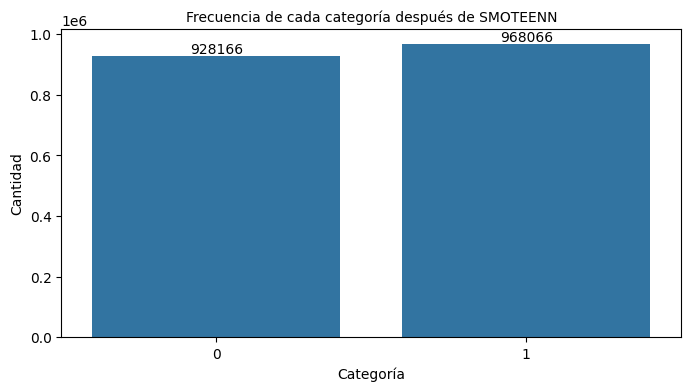

In [27]:
conteo_resampled = y_scaled_feature.value_counts().sort_index()
conteo_resampled = conteo_resampled.reset_index(drop=True)
plt.figure(figsize=(8,4))
bar_plot_ = sns.barplot(x=conteo_resampled.index, y=conteo_resampled.values)

for i, value in enumerate(conteo_resampled.values):
    bar_plot_.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel("Categoría", fontsize=10)
plt.ylabel("Cantidad", fontsize=10)
plt.title("Frecuencia de cada categoría después de SMOTEENN", fontsize=10)

plt.show()

### Eliminar caracteristicas altamente correlacionadas
Se analizan todas las caracteristicas para eliminar aquellas que estan fuertemente correlacionadas

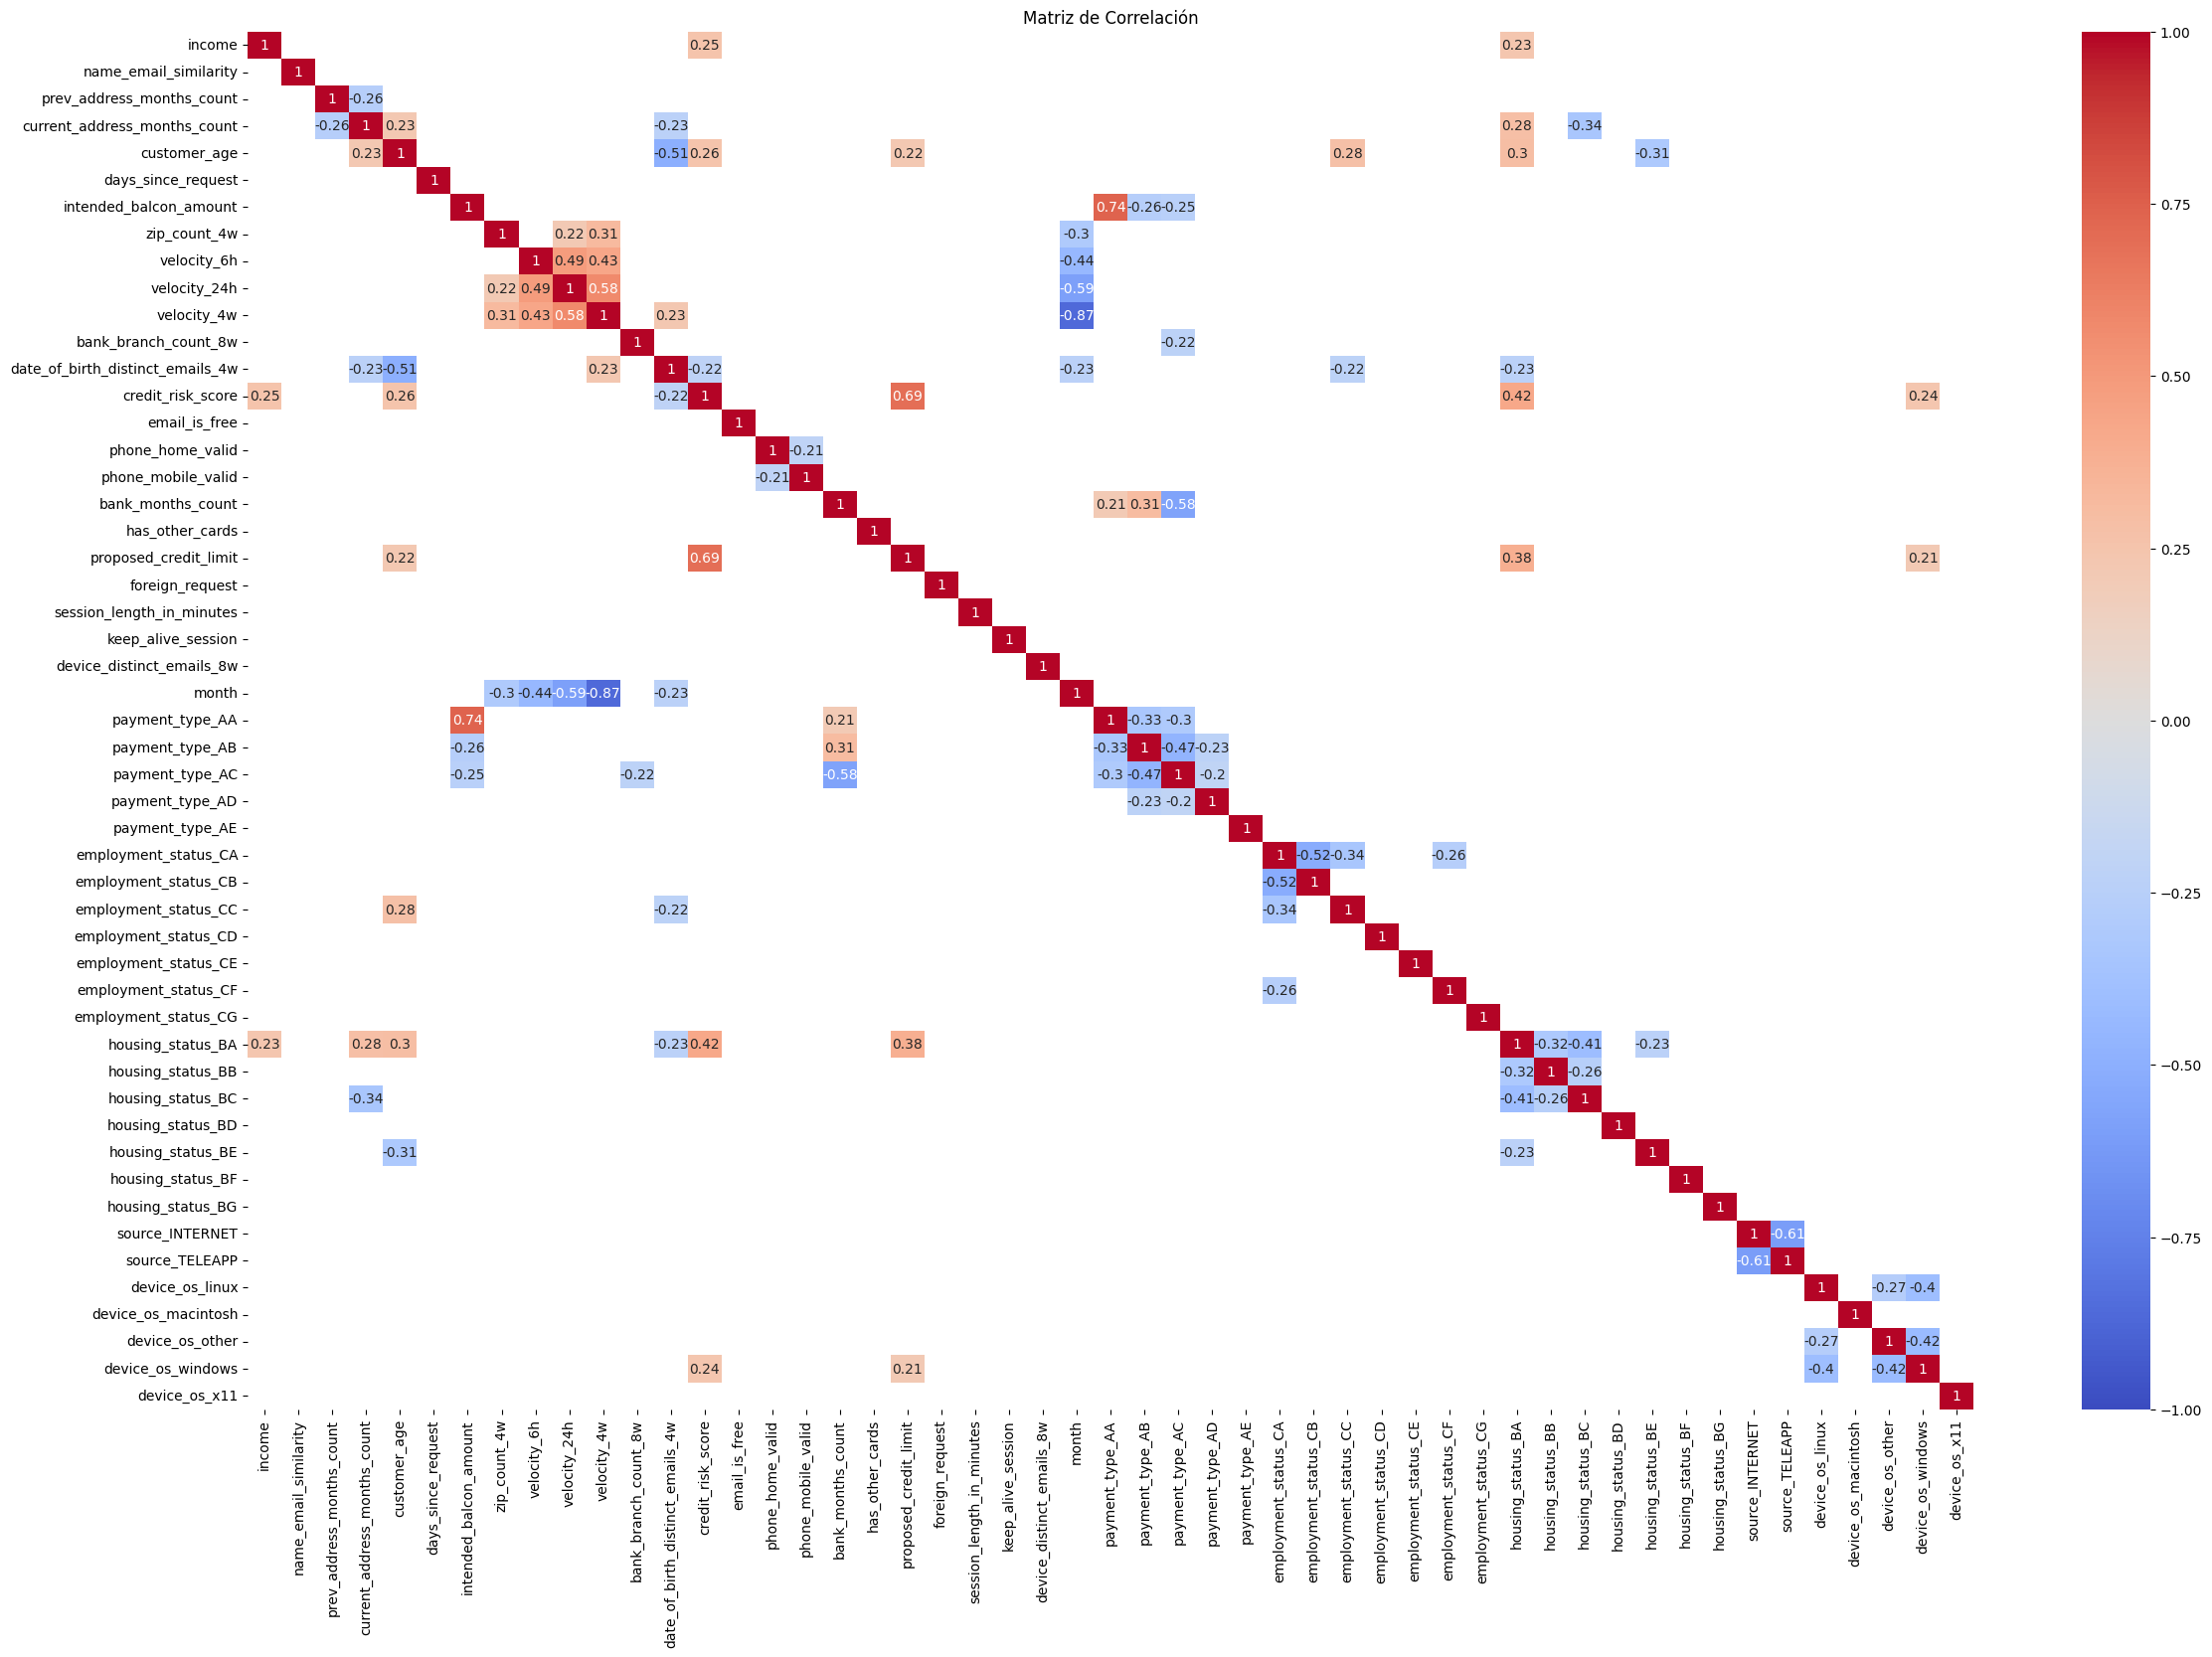

In [28]:
matriz_correlacion = x_scaled_feature.corr()
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(28, 18))
sns.heatmap(matriz_correlacion[(matriz_correlacion >= 0.2) | (matriz_correlacion <= -0.2)], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [29]:
# Function to drop correlated features
def correlation(dataset, threshold):
    col_corr = set ()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features_delete = correlation(x_scaled_feature, 0.7)
print(corr_features_delete)

{'payment_type_AA'}


In [30]:
if corr_features_delete is not None:
    x_scaled_feature.drop(corr_features_delete, axis=1,inplace=True)
    for feature in corr_features_delete:
        if feature in categorical_columns_encoded:
            categorical_columns_encoded.remove(feature)

        if feature in numerical_columns:
            numerical_columns.remove(feature)


x_scaled_feature

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,-0.600000,0.931607,0.000000,-0.245455,0.500000,-0.440576,18.685050,-0.192161,1.834393,1.436309,1.508179,-0.166667,-0.571429,0.414894,1,0,1,0.153846,0,4.193548,0,1.934382,1,0.000000,-0.750000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0.400000,0.236273,0.000000,0.336364,-0.500000,-0.264113,-0.003323,0.380497,0.921561,0.462896,0.850154,-0.250000,1.285714,0.319149,1,1,1,-0.115385,0,4.193548,0,-0.304572,1,0.000000,-0.750000,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0.400000,0.950824,0.769231,-0.345455,0.500000,-0.147446,-0.119255,-0.157744,-0.198470,0.336574,0.891991,0.250000,0.285714,-0.372340,1,0,1,0.961538,0,0.000000,0,3.066954,0,0.000000,-0.750000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.000000,-0.031863,0.923077,-0.345455,0.000000,-0.427159,-0.186682,2.125239,2.149286,0.929837,0.873725,0.083333,0.571429,-0.361702,1,0,1,-0.153846,0,0.000000,0,1.758721,1,0.000000,-0.750000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,0.600000,0.659940,0.000000,-0.209091,0.500000,300.826381,8.680625,1.031549,0.539300,0.175729,0.849389,-0.333333,-0.428571,-0.351064,0,1,1,0.807692,0,0.000000,0,-0.238559,0,0.000000,-0.750000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896227,-0.983625,-0.665417,0.000000,1.716555,0.500000,0.478321,0.019847,0.183759,0.714030,-0.127967,0.164368,-0.334016,-0.147536,1.189747,1,0,1,-0.230769,0,4.193548,0,0.309803,0,0.000000,0.004094,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1896228,0.600000,-0.705779,0.000000,0.584132,1.000000,-0.278240,0.067697,-0.380619,0.254978,0.594981,0.394210,-0.137121,-0.115152,0.893811,0,0,1,0.961538,0,2.580645,0,-0.257872,0,0.000000,-0.403031,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1896229,0.053033,0.325396,0.000000,-0.059571,0.255055,-0.242688,-0.018784,-0.355585,0.419955,0.779299,0.548802,-0.375000,0.425683,-1.042553,1,0,0,-0.230769,0,0.000000,0,-0.184687,0,0.000000,-0.500000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1896230,0.368068,-0.401828,0.000000,0.382354,-0.079831,-0.394500,-0.021810,-0.331603,1.304683,-0.513450,0.466912,0.133404,0.051622,-1.000447,0,0,1,0.961538,0,0.000000,0,-0.142980,0,-0.159662,-0.500000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


#####   Conclusión
Se eliminan las variables que tienen una alta correlación entre ellas por lo que se elimina la variable `payment_type_AA`

### Asociación de variables binarias
**H0**: La variable categórica no está asociada.\
**H1**: La variable categórica está asociada con la variable objetivo.\
Variables categoricas con solo dos categoricas: email_is_free, phone_home_valid, phone_mobile_valid, has_other_cards, foreign_request, keep_alive_session

Para este analisis se ocupa la prueba estadistica de Fisher, utilizado para determinar si existe una asociación significativa entre dos variables categóricas. Es útil cuando se trabaja con muestras pequeñas o cuando se desea una precisión extrema en el cálculo de los valores de significancia.

In [31]:
result_analysis_binary = []
def prueba_fisher(tabla):
    var_analysis = {}
    odds_ratio, p_valor = fisher_exact(tabla)
    var_analysis['Variable'] = variable
    var_analysis['Valor p'] = p_valor

    if p_valor < 0.05:
        var_analysis['Analisis p_valor'] = "Existe una asociación significativa entre las variables."
    else:
        var_analysis['Analisis p_valor'] = "No hay suficiente evidencia para afirmar que las variables están asociadas."

    var_analysis['Odds Ratio'] = odds_ratio
    if odds_ratio > 1:
        var_analysis['Analisis odds_ratio'] = "El evento es más probable en el variable de analisis."
    elif odds_ratio < 1:
        var_analysis['Analisis odds_ratio'] = "El evento es más probable en la variable objetivo."
    else:
        var_analysis['Analisis odds_ratio'] = "No hay diferencia en la probabilidad del evento entre los grupos."

    return var_analysis


categorical_columns_bivar = set(x_scaled_feature.columns)-set(numerical_columns)

for variable in categorical_columns_bivar:
    contingency_table = pd.crosstab(x_scaled_feature[variable], y_scaled_feature[target_var])
    result_analysis_binary.append(prueba_fisher(contingency_table))

data_analysis_binary = pd.DataFrame(result_analysis_binary)
data_analysis_binary.sort_values(by='Odds Ratio',inplace=True)
data_analysis_binary

,Variable,Valor p,Analisis p_valor,Odds Ratio,Analisis odds_ratio
17,payment_type_AE,1.381899e-79,Existe una asociación significativa entre las variables.,0.003672,El evento es más probable en la variable objetivo.
27,housing_status_BG,1.457821e-71,Existe una asociación significativa entre las variables.,0.004079,El evento es más probable en la variable objetivo.
28,housing_status_BF,0.000000e+00,Existe una asociación significativa entre las variables.,0.004405,El evento es más probable en la variable objetivo.
4,employment_status_CE,0.000000e+00,Existe una asociación significativa entre las variables.,0.009377,El evento es más probable en la variable objetivo.
25,employment_status_CF,0.000000e+00,Existe una asociación significativa entre las variables.,0.010979,El evento es más probable en la variable objetivo.
7,employment_status_CG,3.980273e-116,Existe una asociación significativa entre las variables.,0.014094,El evento es más probable en la variable objetivo.
1,employment_status_CD,0.000000e+00,Existe una asociación significativa entre las variables.,0.020991,El evento es más probable en la variable objetivo.
9,device_os_x11,0.000000e+00,Existe una asociación significativa entre las variables.,0.026476,El evento es más probable en la variable objetivo.
10,has_other_cards,0.000000e+00,Existe una asociación significativa entre las variables.,0.067671,El evento es más probable en la variable objetivo.
30,housing_status_BD,0.000000e+00,Existe una asociación significativa entre las variables.,0.077368,El evento es más probable en la variable objetivo.


In [32]:
#Variables con Odd Ratio > 1
data_analysis_binary[data_analysis_binary['Odds Ratio']>1]
data_analysis_binary['Variable']

17         payment_type_AE
27       housing_status_BG
28       housing_status_BF
4     employment_status_CE
25    employment_status_CF
7     employment_status_CG
1     employment_status_CD
9            device_os_x11
10         has_other_cards
30       housing_status_BD
5        housing_status_BE
23          source_TELEAPP
19         device_os_linux
29      keep_alive_session
15        phone_home_valid
21    employment_status_CB
18       housing_status_BB
16         device_os_other
12         foreign_request
3        housing_status_BC
26     device_os_macintosh
22         payment_type_AD
24      phone_mobile_valid
20         source_INTERNET
11         payment_type_AB
13           email_is_free
8     employment_status_CC
14    employment_status_CA
6          payment_type_AC
0        device_os_windows
2        housing_status_BA
Name: Variable, dtype: object

In [33]:
#Se filtran los valores de Odds Ratio con valores > 1 lo que representa a medida que la variable aumenta, la probabilidad de que ocurra el evento aumenta; 
#adicionalemente se eliminan los datos con fuerte asociación pero pueden dar paso a un posible overfitting en el modelo
data_analysis_binary_ = data_analysis_binary.copy()
data_analysis_binary_ = data_analysis_binary_[(data_analysis_binary_['Odds Ratio']>1) & (data_analysis_binary_['Valor p']<0.05)]
# Reemplazar los valores infinitos por NaN
data_analysis_binary_.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar las filas con NaN
data_analysis_binary_.dropna(inplace=True)
data_analysis_binary_.sort_values(by='Odds Ratio',inplace=True)
data_analysis_binary_.reset_index(drop=True,inplace=True)
data_analysis_binary_

,Variable,Valor p,Analisis p_valor,Odds Ratio,Analisis odds_ratio
0,email_is_free,9.805041e-88,Existe una asociación significativa entre las variables.,1.059521,El evento es más probable en el variable de analisis.
1,employment_status_CC,6.618317e-45,Existe una asociación significativa entre las variables.,1.113384,El evento es más probable en el variable de analisis.
2,employment_status_CA,0.000000e+00,Existe una asociación significativa entre las variables.,1.211923,El evento es más probable en el variable de analisis.
3,payment_type_AC,0.000000e+00,Existe una asociación significativa entre las variables.,1.584489,El evento es más probable en el variable de analisis.
4,device_os_windows,0.000000e+00,Existe una asociación significativa entre las variables.,3.141976,El evento es más probable en el variable de analisis.
5,housing_status_BA,0.000000e+00,Existe una asociación significativa entre las variables.,5.566511,El evento es más probable en el variable de analisis.


##### Conclusion
**Valor p**: Todas las variables tienen un valor p menor que 0.05, rechazamos la hipótesis nula y afirmamos que hay una asociación de estas variables con la variable objetivo.

**Razón de probabilidades (odds ratio)**: 
Las variables `email_is_free`, `employment_status_CC`, `employment_status_CA`, `payment_type_AC`, `device_os_windows` y `housing_status_BA`, tienen una razón de probabilidades mayor que 1, por lo tanto, podemos concluir que están asociadas positivamente con el evento objetivo (fraud_bool).

Finalmente con los resultados anteriores se toman las variables `email_is_free`, `employment_status_CC`, `employment_status_CA`, `payment_type_AC`, `device_os_windows` y `housing_status_BA` que cumplen ambos criterios por ser valores más significativos que aporten información para el modelo.

In [34]:
binary_preselected_variables =  data_analysis_binary_['Variable'].to_list()
binary_preselected_variables

['email_is_free',
 'employment_status_CC',
 'employment_status_CA',
 'payment_type_AC',
 'device_os_windows',
 'housing_status_BA']

### Analisis de la correlación en variables númericas

Una matriz de correlación es una tabla que muestra los coeficientes de correlación entre varias variables. Cada celda de la tabla muestra el valor de la correlación entre dos variables diferentes. Los coeficientes de correlación pueden variar entre -1 y 1, donde:

1: indica una correlación positiva perfecta. \
-1: indica una correlación negativa perfecta. \
0: indica que no hay correlación.

In [35]:
numerical_columns_corr = numerical_columns.copy()

In [36]:
matriz_correlacion = x_scaled_feature[numerical_columns_corr].corr()
matriz_correlacion

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,month
income,1.000000,-0.076302,-0.022274,0.018106,0.168489,-0.007812,0.000997,-0.077208,-0.124021,-0.130415,-0.128116,-0.017707,-0.112663,0.253353,-0.014349,0.197507,-0.049650,-0.014717,0.137015
name_email_similarity,-0.076302,1.000000,0.010535,0.015169,-0.089447,-0.010227,0.067470,0.018799,0.042019,0.048627,0.058579,0.015654,0.064141,0.018484,-0.017299,0.041955,0.000969,-0.049298,-0.061690
prev_address_months_count,-0.022274,0.010535,1.000000,-0.260409,-0.108188,0.074030,0.006763,-0.025121,0.014439,0.018689,0.015664,-0.026434,0.091559,-0.071636,-0.043050,-0.065296,0.030316,0.000061,-0.013370
current_address_months_count,0.018106,0.015169,-0.260409,1.000000,0.226371,-0.057867,0.027265,0.034939,0.011518,0.011372,0.017331,0.028031,-0.230944,0.180737,0.043228,0.184160,-0.008766,0.010713,-0.011548
customer_age,0.168489,-0.089447,-0.108188,0.226371,1.000000,-0.030909,-0.043633,-0.012513,-0.033475,-0.005953,-0.001528,0.030219,-0.506310,0.256709,0.011377,0.222821,0.047522,0.072567,0.006426
days_since_request,-0.007812,-0.010227,0.074030,-0.057867,-0.030909,1.000000,0.023013,0.006676,0.034358,0.018430,0.017390,-0.014946,0.022219,-0.085964,-0.034041,-0.064450,0.037810,0.029113,-0.019082
intended_balcon_amount,0.000997,0.067470,0.006763,0.027265,-0.043633,0.023013,1.000000,0.020878,0.069607,0.081637,0.076224,0.091212,0.017203,-0.056084,0.159003,-0.018649,0.013227,-0.034701,-0.069993
zip_count_4w,-0.077208,0.018799,-0.025121,0.034939,-0.012513,0.006676,0.020878,1.000000,0.144301,0.216668,0.313335,0.011740,0.119149,-0.100998,0.047607,-0.024937,0.046998,0.044917,-0.299703
velocity_6h,-0.124021,0.042019,0.014439,0.011518,-0.033475,0.034358,0.069607,0.144301,1.000000,0.490834,0.433012,0.032874,0.130571,-0.186250,0.017711,-0.073214,0.049351,0.051125,-0.444243
velocity_24h,-0.130415,0.048627,0.018689,0.011372,-0.005953,0.018430,0.081637,0.216668,0.490834,1.000000,0.577811,0.055326,0.149162,-0.173187,0.022697,-0.029045,0.060141,0.060008,-0.587003


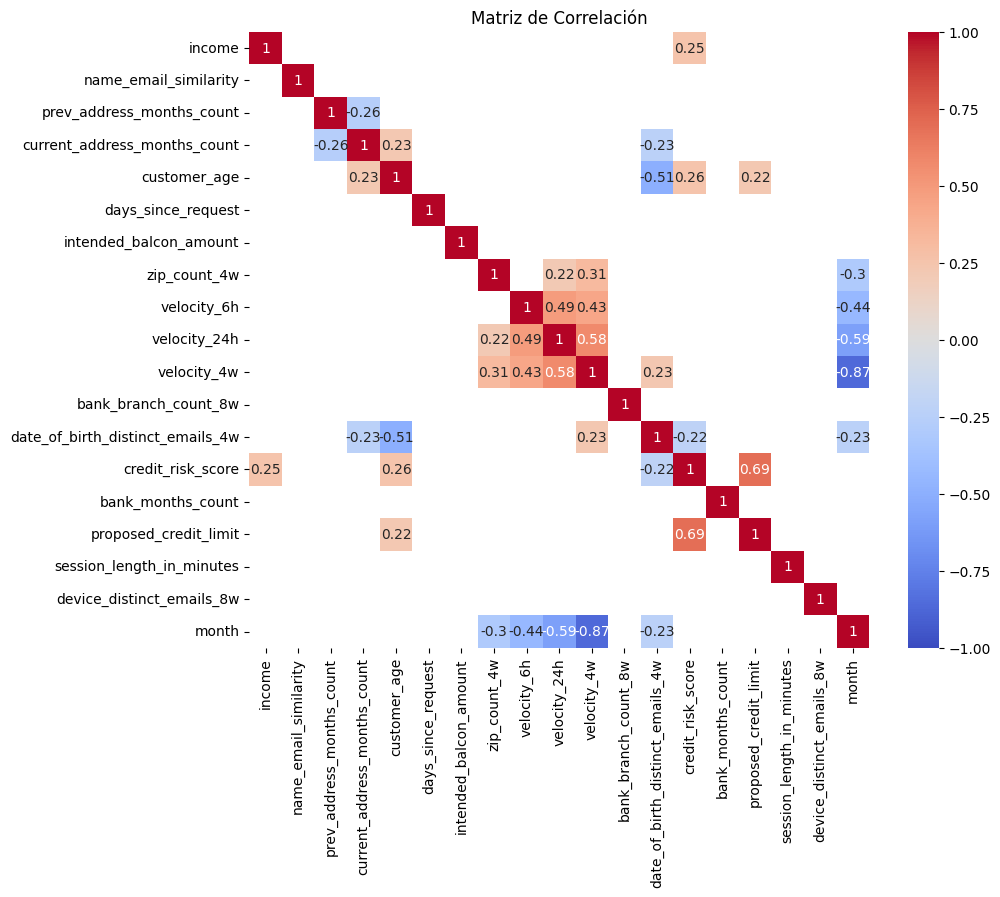

In [37]:
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion[(matriz_correlacion >= 0.2) | (matriz_correlacion <= -0.2)], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

##### Conclusion
Se observa que las variables entre si no tienen valores altos en su correlación es decir correlación > 0.8 o < -0.8 entre ellas excepto por las varibales `month` y `velocity_4w` por lo que se va a hacer el analisis de multicolinealidad de las variables numericas antes de descarter una de ellas.

#### Analisis de la multicolinealidad de las variables numericas
Para evaluar las variables se usa VIF (Variance Inflation Factor) para evaluar la multicolinealidad en un modelo de regresión múltiple. La multicolinealidad ocurre cuando dos o más variables predictoras en un modelo están altamente correlacionadas entre sí, lo cual puede ser problemático porque puede llevar a coeficientes de regresión poco fiables y dificultar la interpretación de los efectos individuales de las variables predictoras. 

In [38]:
vif_data = x_scaled_feature[numerical_columns_corr]
#Agregando una columna constante para la intersección
X = sm.add_constant(vif_data)
# Calcula el VIF para cada columna
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif = vif[vif["Variable"] != "const"]
vif

,Variable,VIF
1,income,1.111551
2,name_email_similarity,1.029206
3,prev_address_months_count,1.083599
4,current_address_months_count,1.178388
5,customer_age,1.482741
6,days_since_request,1.017511
7,intended_balcon_amount,1.050583
8,zip_count_4w,1.126236
9,velocity_6h,1.409094
10,velocity_24h,1.747695


In [39]:
#Se revisa la correlación de la varible month con el resto de variables
correlations = x_scaled_feature[numerical_columns_corr].corr()['month'].drop('month').abs().sort_values(ascending=False)
print(correlations)

velocity_4w                         0.865509
velocity_24h                        0.587003
velocity_6h                         0.444243
zip_count_4w                        0.299703
date_of_birth_distinct_emails_4w    0.230007
credit_risk_score                   0.171746
income                              0.137015
session_length_in_minutes           0.073872
intended_balcon_amount              0.069993
device_distinct_emails_8w           0.066821
name_email_similarity               0.061690
bank_branch_count_8w                0.049228
bank_months_count                   0.031156
days_since_request                  0.019082
prev_address_months_count           0.013370
proposed_credit_limit               0.012988
current_address_months_count        0.011548
customer_age                        0.006426
Name: month, dtype: float64


In [40]:
#Se revisa la correlación de la varible velocity_4w con el resto de variables
correlations = x_scaled_feature[numerical_columns_corr].corr()['velocity_4w'].drop('velocity_4w').abs().sort_values(ascending=False)
print(correlations)

month                               0.865509
velocity_24h                        0.577811
velocity_6h                         0.433012
zip_count_4w                        0.313335
date_of_birth_distinct_emails_4w    0.228994
credit_risk_score                   0.166113
income                              0.128116
intended_balcon_amount              0.076224
session_length_in_minutes           0.071802
device_distinct_emails_8w           0.061254
name_email_similarity               0.058579
bank_branch_count_8w                0.050429
bank_months_count                   0.039664
days_since_request                  0.017390
current_address_months_count        0.017331
prev_address_months_count           0.015664
proposed_credit_limit               0.012326
customer_age                        0.001528
Name: velocity_4w, dtype: float64


##### Conclusión
Las variables velocity_4w y month podrían estar correlacionadas con otras, pero el problema no es grave:

Dado que la variable month no tiene una colinealidad excesiva y en el analisis de la variación del fraude con respecto al mes si cambia por lo que se decide dejar las variable `velocity_4w` y `month` debido a que tienen una alta correlación con un VIF alto y ambas variables capturan comportamientos cambiantes en el tiempo.

In [41]:
numerical_columns_corr

['income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'device_distinct_emails_8w',
 'month']

#### Selección de caracteristicas numericas respecto a la variable objetivo
Se utiliza la matriz de correlación para la verificación de la relación lineal entre las caracteristicas de las variables númericas y la variable objetivo

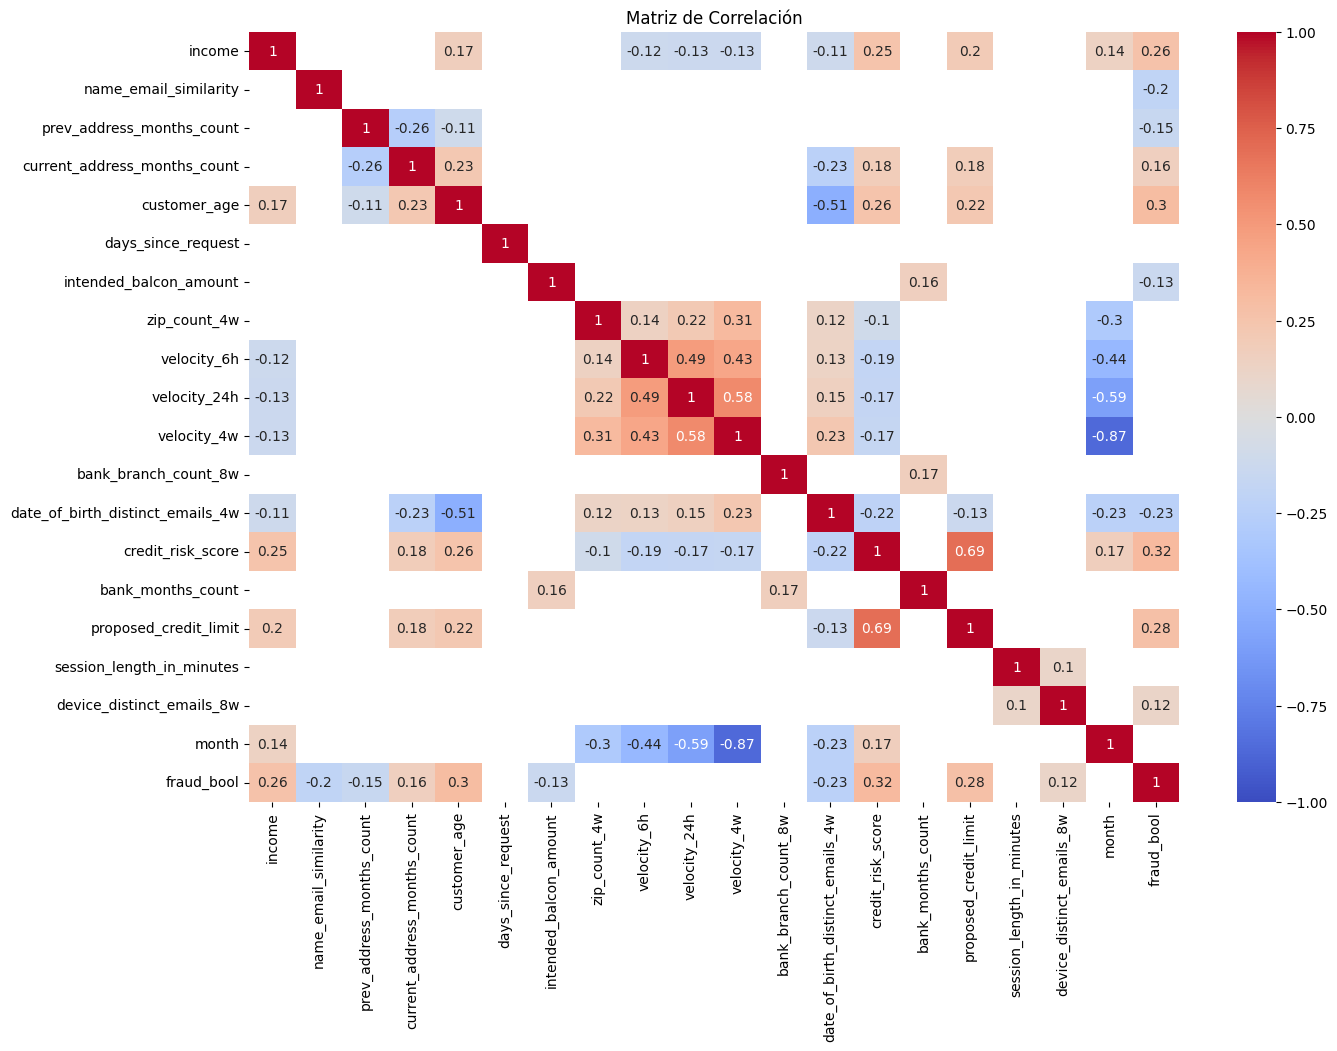

In [42]:
all_scaled_feature = x_scaled_feature[numerical_columns_corr].copy()
all_scaled_feature[target_var] = y_scaled_feature
matriz_correlacion = all_scaled_feature.corr()
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacion[(matriz_correlacion >= 0.1) | (matriz_correlacion <= -0.1)], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [43]:
df_corr_target = matriz_correlacion[target_var].reset_index()
df_corr_target['Abs coef. pearson'] = df_corr_target['fraud_bool'].abs()
df_corr_target = df_corr_target[df_corr_target['index']!=target_var]
df_corr_target = df_corr_target.rename(columns={'index': 'Variable','fraud_bool': 'Coeficiente de pearson'}).sort_values(by='Abs coef. pearson',ascending=False)
df_corr_target

,Variable,Coeficiente de pearson,Abs coef. pearson
13,credit_risk_score,0.317961,0.317961
4,customer_age,0.299870,0.299870
15,proposed_credit_limit,0.276845,0.276845
0,income,0.260856,0.260856
12,date_of_birth_distinct_emails_4w,-0.228389,0.228389
1,name_email_similarity,-0.199028,0.199028
3,current_address_months_count,0.163246,0.163246
2,prev_address_months_count,-0.151562,0.151562
6,intended_balcon_amount,-0.132937,0.132937
17,device_distinct_emails_8w,0.117096,0.117096


##### Conclusión
Se selecciona variables con una correlación más fuerte (|r| ≥ 0.3) que en este caso son las más cercanas al valor por lo que se toman las variables que tengan un valor mayo a 0.20 dando como resultado las siguientes variables:

In [44]:
#Se toman las variables que tiene un valor del coeficiente de pearson mayor a 0.20 
numeric_preselected_variables_corr = df_corr_target[df_corr_target['Abs coef. pearson']>0.20]['Variable'].to_list()
numeric_preselected_variables_corr

['credit_risk_score',
 'customer_age',
 'proposed_credit_limit',
 'income',
 'date_of_birth_distinct_emails_4w']

#### Verificación de una relación no lineal entre las variables
`mutual_info_classif` es una función de Scikit-learn que calcula la información mutua entre cada variable independiente y la variable objetivo en problemas de clasificación. La información mutua mide cuánta información sobre la variable objetivo aporta cada variable independiente, incluso cuando la relación entre ellas no es lineal.

In [45]:
X_train_num = x_scaled_feature[numerical_columns_corr].copy()

# Create a copy of the target variable
y_train_num = y_scaled_feature.copy()
mutual_info_results = mutual_info_classif(X_train_num, y_train_num,random_state=random_seed)
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

In [46]:
mutual_info_results_df.sort_values(by="mutual_info",ascending=False)

,feature,mutual_info
13,credit_risk_score,0.647258
3,current_address_months_count,0.641613
7,zip_count_4w,0.635410
12,date_of_birth_distinct_emails_4w,0.517781
11,bank_branch_count_8w,0.471437
0,income,0.429359
14,bank_months_count,0.391272
18,month,0.358455
4,customer_age,0.338319
15,proposed_credit_limit,0.161753


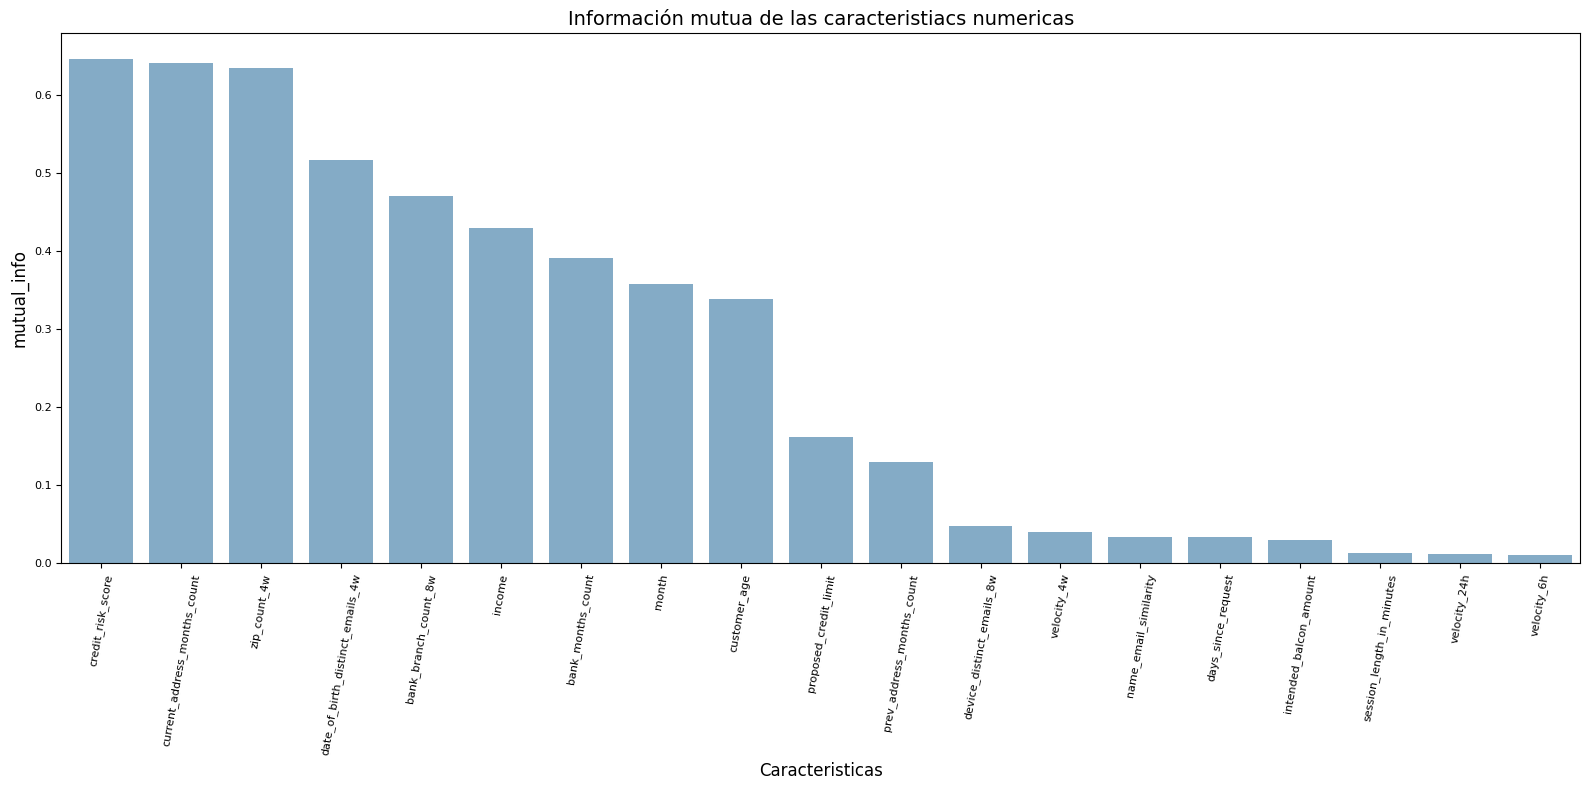

In [47]:
plt.figure(figsize=(16, 8))
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", alpha=.6)

plt.xlabel("Caracteristicas", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=80, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Información mutua de las caracteristiacs numericas", fontsize=14)

plt.tight_layout()

plt.show()

##### Umbral basado en el "codo" (Elbow Method)
Este método consiste en graficar los valores de mutual_info y ver en qué punto comienzan a disminuir rápidamente.

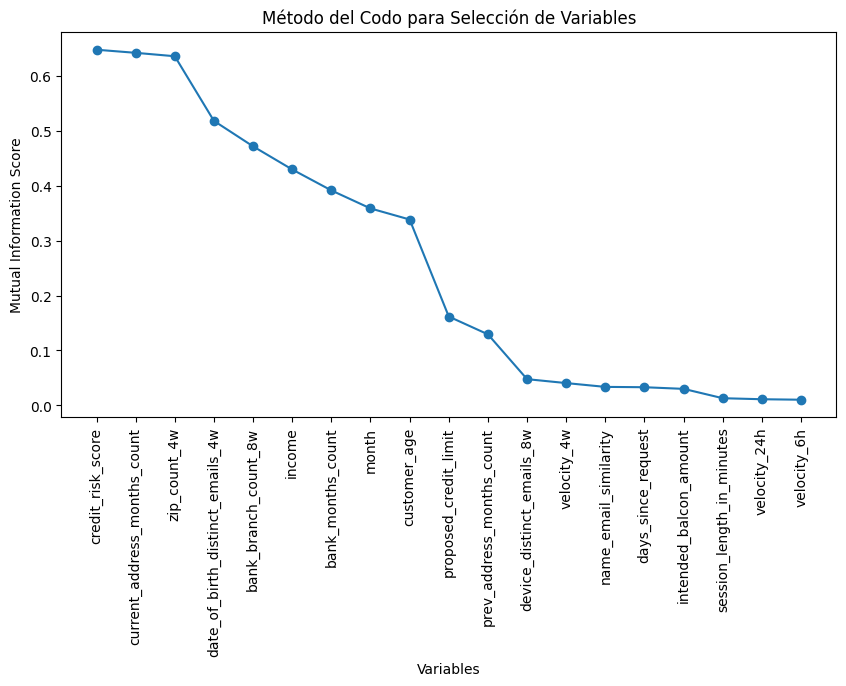

In [48]:
sorted_mi = sorted(zip(mutual_info_results_df['feature'], mutual_info_results_df['mutual_info']), key=lambda x: x[1], reverse=True)

# Graficar
plt.figure(figsize=(10,5))
plt.plot(range(len(sorted_mi)), [x[1] for x in sorted_mi], marker="o", linestyle="-")
plt.xticks(range(len(sorted_mi)), [x[0] for x in sorted_mi], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Mutual Information Score")
plt.title("Método del Codo para Selección de Variables")
plt.show()

##### Conclusión
En la gráfica, el punto de inflexión ("codo") parece ocurre alrededor de la característica número 10. Esto indica que después de ese punto, la ganancia en información mutua disminuye significativamente.

Por lo tanto, se seleccionan las 10 primeras características con mayor información mutua para optimizar la selección de variables, siuendo las siguientes:

In [49]:
# Se seleccionan las variables hasta la variable proposed_credit_limit es decir las 10 primeras
numeric_preselected_variables_mutual_info = mutual_info_results_df.sort_values(by='mutual_info',ascending=False).head(10)['feature'].tolist()
numeric_preselected_variables_mutual_info

['credit_risk_score',
 'current_address_months_count',
 'zip_count_4w',
 'date_of_birth_distinct_emails_4w',
 'bank_branch_count_8w',
 'income',
 'bank_months_count',
 'month',
 'customer_age',
 'proposed_credit_limit']

### Analisis con un modelo de machine learning
Se analiza la importancia de las variables con respecto a la variable objetivo y seleccionar las variables que pueden aportar al modelo para ello se va a seleccionar ExtraTreesClassifier debido a su capacidad de  para calcular la importancia de las caracteristicas.

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

#### Caracteristicas categoricas

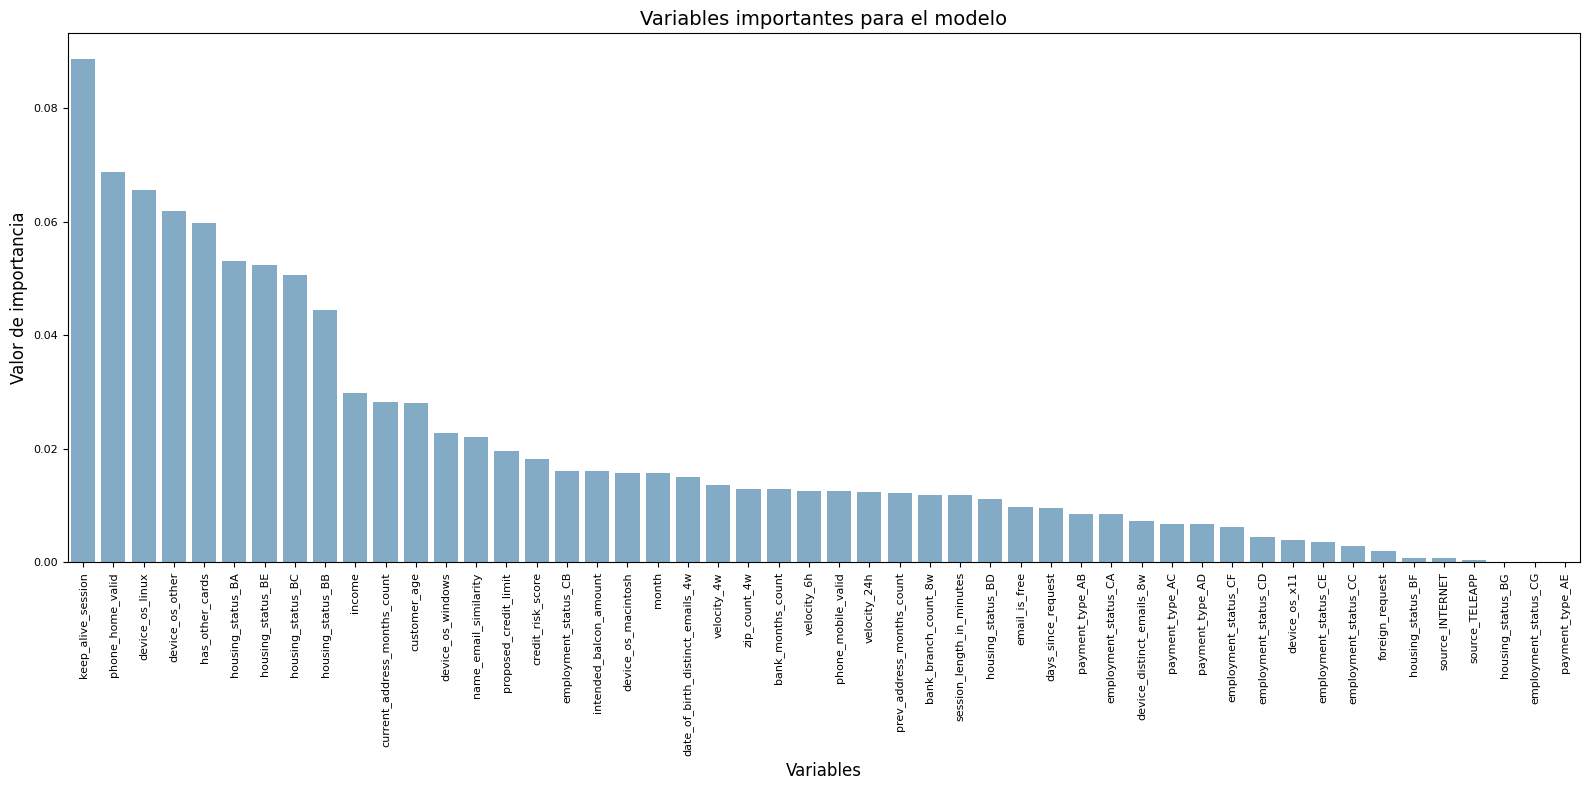

In [51]:
path_importance = './extra_trees_classifier_results.csv'
extra_importances=None
if os.path.isfile(path_importance):
    extra_importances = pd.read_csv(path_importance)
else:
    extra_trees = ExtraTreesClassifier(
        random_state=random_seed,
        n_estimators=1000, 
        max_features='sqrt', 
        max_depth=None, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        bootstrap=True, 
        criterion='gini', 
        n_jobs=-1
    )

    extra_trees.fit(x_scaled_feature, y_scaled_feature)
    feature_sel_extra = SelectFromModel(extra_trees, prefit=True)
    best_extra_features = [x_scaled_feature.columns[(feature_sel_extra.get_support())]]
    best_extra_features = list(best_extra_features[0])

    extra_importances = pd.DataFrame({'feature': x_scaled_feature.columns, 'importance': extra_trees.feature_importances_, 'model': 'ExtraTreesClassifier'})
    extra_importances.to_csv(path_importance,index=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", alpha=.6)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Valor de importancia", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Variables importantes para el modelo", fontsize=14)
plt.tight_layout()
plt.show()

In [52]:
importance_df  = extra_importances.sort_values(by='importance',ascending=False)
importance_df

,feature,importance,model
22,keep_alive_session,0.088785,ExtraTreesClassifier
15,phone_home_valid,0.068752,ExtraTreesClassifier
45,device_os_linux,0.065624,ExtraTreesClassifier
47,device_os_other,0.061884,ExtraTreesClassifier
18,has_other_cards,0.059888,ExtraTreesClassifier
36,housing_status_BA,0.053148,ExtraTreesClassifier
40,housing_status_BE,0.052442,ExtraTreesClassifier
38,housing_status_BC,0.050560,ExtraTreesClassifier
37,housing_status_BB,0.044550,ExtraTreesClassifier
0,income,0.029759,ExtraTreesClassifier


In [53]:
threshold = 0.90
importance_df['Cumulative Importance'] = np.cumsum(importance_df['importance'])
selected_features = importance_df[importance_df['Cumulative Importance'] <= threshold]
selected_features

,feature,importance,model,Cumulative Importance
22,keep_alive_session,0.088785,ExtraTreesClassifier,0.088785
15,phone_home_valid,0.068752,ExtraTreesClassifier,0.157537
45,device_os_linux,0.065624,ExtraTreesClassifier,0.223161
47,device_os_other,0.061884,ExtraTreesClassifier,0.285045
18,has_other_cards,0.059888,ExtraTreesClassifier,0.344933
36,housing_status_BA,0.053148,ExtraTreesClassifier,0.398081
40,housing_status_BE,0.052442,ExtraTreesClassifier,0.450523
38,housing_status_BC,0.050560,ExtraTreesClassifier,0.501083
37,housing_status_BB,0.044550,ExtraTreesClassifier,0.545633
0,income,0.029759,ExtraTreesClassifier,0.575392


In [54]:
preselected_variables_etc = importance_df.head()['feature'].to_list()
preselected_variables_etc

['keep_alive_session',
 'phone_home_valid',
 'device_os_linux',
 'device_os_other',
 'has_other_cards']

##### Conclusión
Se seleccionan las 5 primeras caracteristicas basadas en la importancia del modelo ExtraTreesClassifier debido a que su importancia son las más altas según el modelo, lo que significa que estas características son las que más contribuyen a la predicción de la variable objetivo.

### Selección final de caracteristicas
Se seleccionan todas las variables que han sido preseleccionadas previamente para seleccionar solo las más representativas y para ello se usa

In [55]:
all_features_selected = list(set(binary_preselected_variables+numeric_preselected_variables_corr+numeric_preselected_variables_mutual_info+preselected_variables_etc))
all_features_selected

['device_os_windows',
 'housing_status_BA',
 'month',
 'credit_risk_score',
 'customer_age',
 'income',
 'payment_type_AC',
 'employment_status_CC',
 'date_of_birth_distinct_emails_4w',
 'has_other_cards',
 'email_is_free',
 'employment_status_CA',
 'phone_home_valid',
 'device_os_other',
 'device_os_linux',
 'zip_count_4w',
 'proposed_credit_limit',
 'current_address_months_count',
 'bank_branch_count_8w',
 'keep_alive_session',
 'bank_months_count']

##### Uso de Recursive Feature Elimination con Validación Cruzada (RFECV)
RFECV es una técnica avanzada que no solo elimina características de manera recursiva, sino que también optimiza la selección del número de características utilizando validación cruzada. Este enfoque es ideal para maximizar la precisión del modelo, minimizando las características irrelevantes.

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from joblib import dump, load

In [57]:
path_rfecv = './rfecv.pkl'

rfe_cv=None
if os.path.isfile(path_rfecv):
    rfe_cv = load(path_rfecv)
else:
    model = ExtraTreesClassifier(n_estimators=100, random_state=random_seed, n_jobs=-1)
    cv = StratifiedKFold(n_splits=5, random_state=random_seed,shuffle=True)
    rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='roc_auc', n_jobs=-1)
    rfe_cv.fit(x_scaled_feature[all_features_selected], y_scaled_feature)
    dump(rfe_cv,path_rfecv)

print("Número óptimo de características:", rfe_cv.n_features_)
print("Características seleccionadas:", x_scaled_feature[all_features_selected].columns[rfe_cv.support_])

final_features = x_scaled_feature[all_features_selected].columns[rfe_cv.support_].to_list()
numerical_final_features = [feature for feature in final_features if feature in numerical_columns]
categorical_binary_final_features = [feature for feature in final_features if feature in categorical_columns_bivar]

Número óptimo de características: 16
Características seleccionadas: Index(['device_os_windows', 'housing_status_BA', 'month', 'credit_risk_score',
       'customer_age', 'income', 'payment_type_AC', 'employment_status_CC',
       'date_of_birth_distinct_emails_4w', 'has_other_cards', 'email_is_free',
       'employment_status_CA', 'device_os_linux', 'proposed_credit_limit',
       'current_address_months_count', 'bank_months_count'],
      dtype='object')


In [58]:
numerical_final_features

['month',
 'credit_risk_score',
 'customer_age',
 'income',
 'date_of_birth_distinct_emails_4w',
 'proposed_credit_limit',
 'current_address_months_count',
 'bank_months_count']

##### Conclusión
En la selección de las características numéricas y binarias preseleccionadas anteriormente se usa RFECV que elimina las caracteristicas de manera recursiva para mejorar la precisión dejando solo las más relevantes en la predicción del fraude.


## Analisis de los datos preprocesados
Se analiza los datos depués de realizar el preprocesamiento para poder visualizar como estan distribuidos 

In [59]:
def analysis_numeric_column(df, ylabel="Frecuencia", xlabel="Distribución"):
    num_cols = df.select_dtypes(include=['number']).columns  # Seleccionar solo columnas numéricas
    num_plots = min(len(num_cols), 10)  # Limitar a 6 gráficos como máximo

    fig, axes = plt.subplots(4, 2, figsize=(12, 7))  # Crear una cuadrícula de 3x2 subgráficas
    axes = axes.flatten()  # Convertir en lista para iterar fácilmente

    for i, col in enumerate(num_cols[:num_plots]):  # Iterar solo sobre las primeras 6 columnas numéricas
        ax = axes[i]
        
        # Crear histograma con seaborn
        sns.histplot(df[col], bins=30, kde=True, ax=ax, color='skyblue')
        
        # Configurar etiquetas y título
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_title(f'Distribución de {col}', fontsize=12)

    # Eliminar ejes vacíos si hay menos de 6 columnas numéricas
    for j in range(i + 1, 6):
        fig.delaxes(axes[j])

    # Ajustar diseño para evitar solapamientos
    plt.tight_layout()
    plt.show()


def analysis_categorical_columns(df, ylabel='Frecuencia', xlabel=''):
    fig, axes = plt.subplots(2, 4, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        if i >= 16: 
            break
        
        value_cont = df[col].value_counts()
        ax = axes[i]
        bars = ax.bar(value_cont.index.astype(str), value_cont, color='skyblue')

        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

        ax.set_xticklabels(value_cont.index.astype(str), fontsize=10)
        ax.set_yticklabels(ax.get_yticks(), fontsize=10)
        
        if ylabel:
            ax.set_ylabel(ylabel, fontsize=10)
        if xlabel:
            ax.set_xlabel(xlabel, fontsize=10)
        
        ax.set_title(f'{col}', fontsize=10)
    
    plt.tight_layout()
    plt.show()


### Analisis de las variables categoricas

In [60]:
data_feature_selection[categorical_binary_final_features]

,device_os_windows,housing_status_BA,payment_type_AC,employment_status_CC,has_other_cards,email_is_free,employment_status_CA,device_os_linux
0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,1,0
2,1,0,0,0,0,1,1,0
3,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
979235,0,0,0,0,0,1,1,0
979236,0,1,1,0,1,0,1,0
979237,0,0,0,0,0,1,1,0
979238,0,0,0,0,0,0,1,1


In [61]:
categorical_binary_final_features

['device_os_windows',
 'housing_status_BA',
 'payment_type_AC',
 'employment_status_CC',
 'has_other_cards',
 'email_is_free',
 'employment_status_CA',
 'device_os_linux']

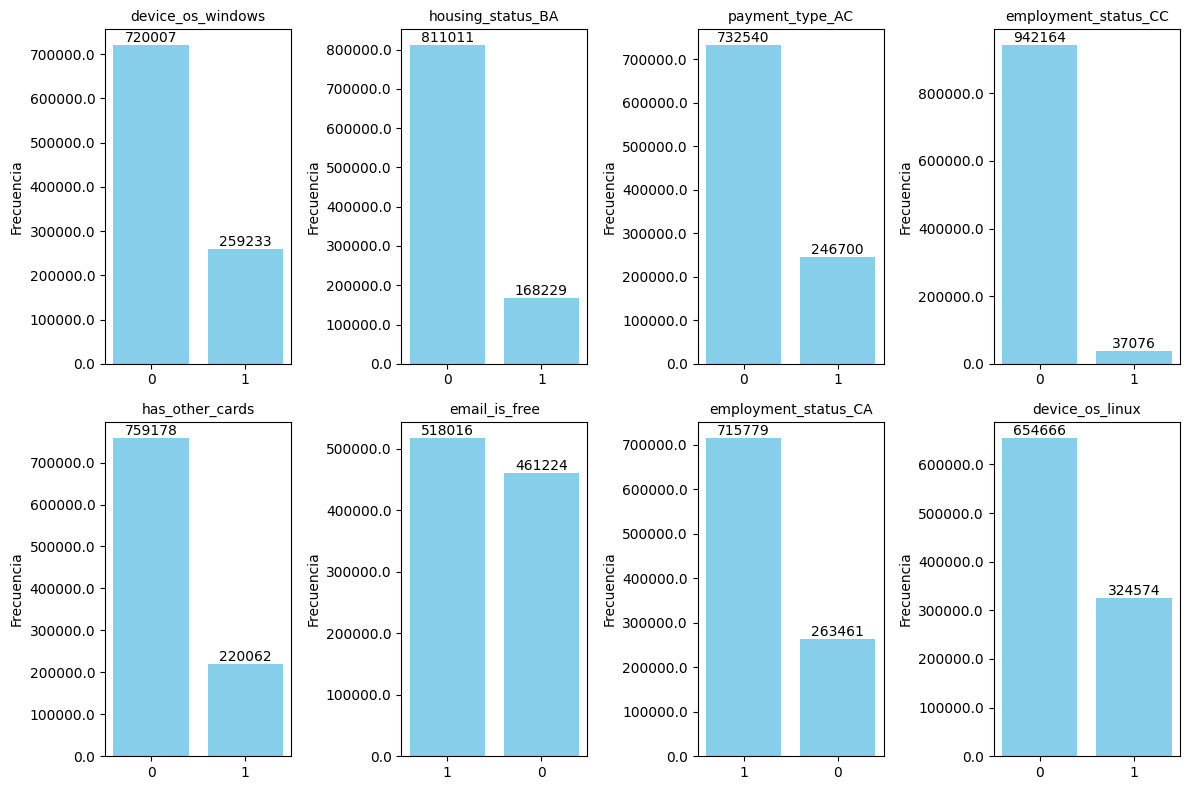

In [62]:
analysis_categorical_columns(data_feature_selection[categorical_binary_final_features])

### Analisis de las variables numericas

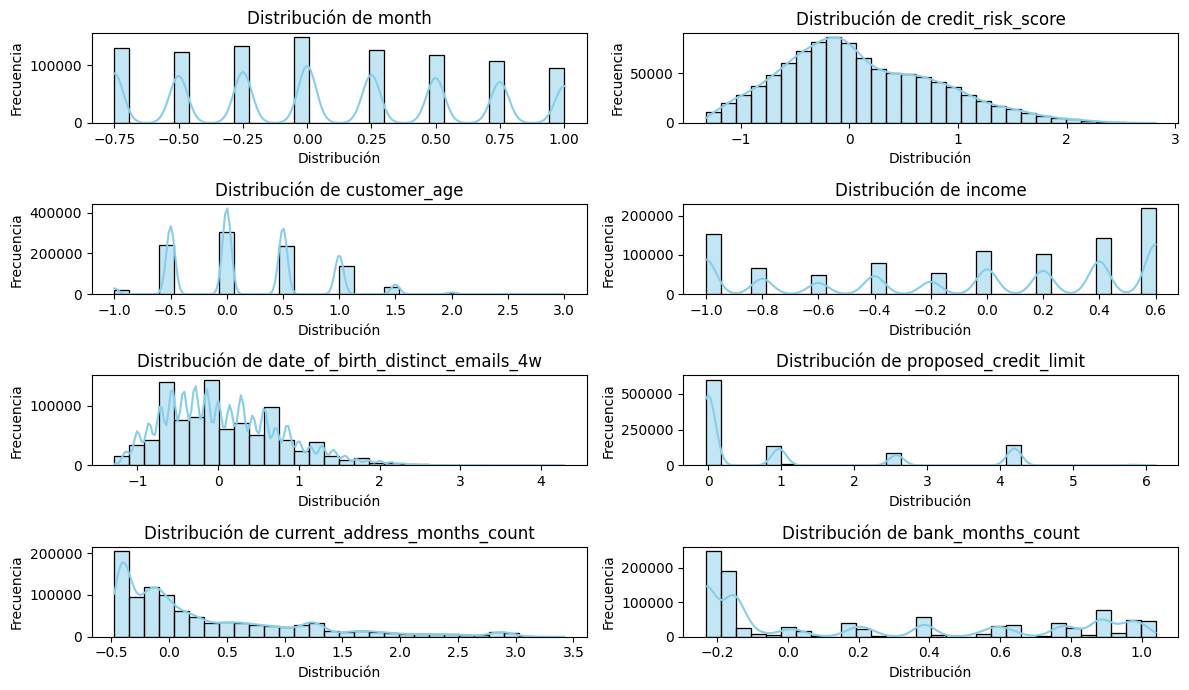

In [63]:
analysis_numeric_column(data_feature_selection[numerical_final_features])

### Revisión de normalidad en los datos numericos

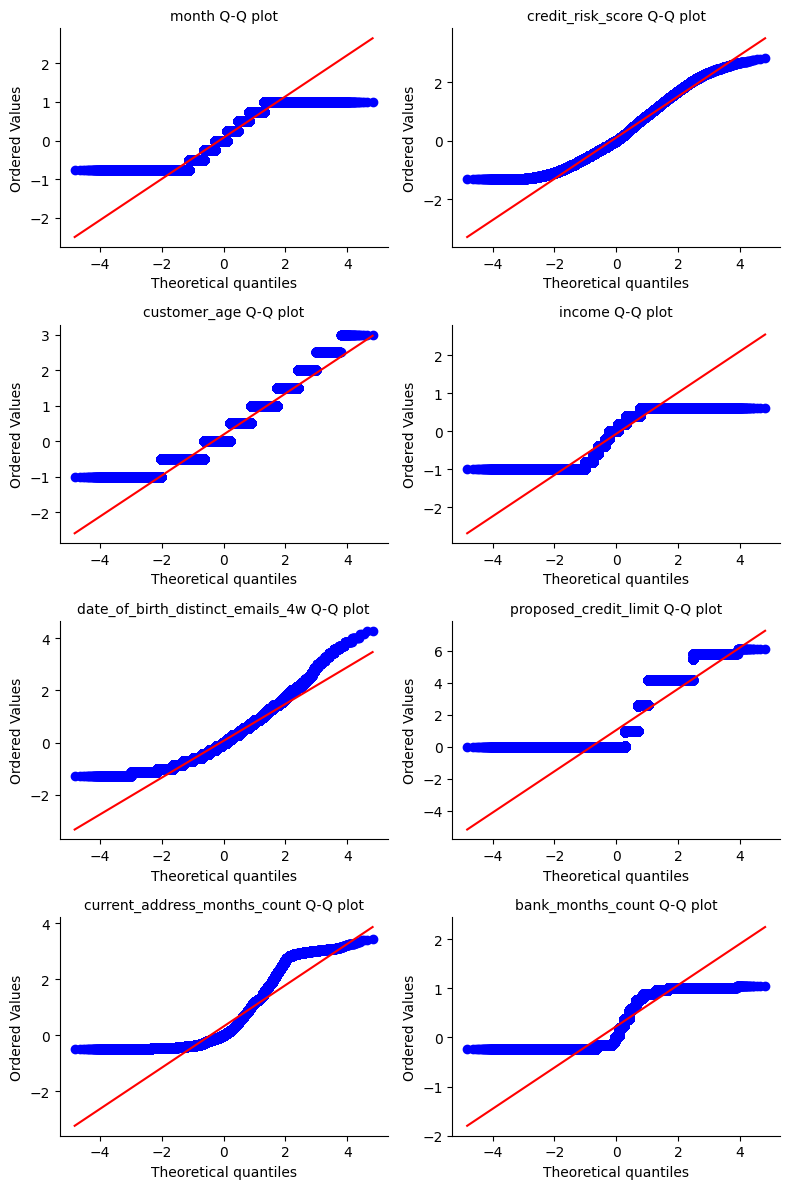

In [64]:
def check_normality(features, data_frame):
    num_features = len(features)
    cols = 2 
    rows = int(np.ceil(num_features / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        stats.probplot(data_frame[feature], dist=stats.norm, plot=axes[i])
        axes[i].set_title(f'{feature} Q-Q plot', fontsize=10)
        sns.despine()
        
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Llamada a la función con tus datos
check_normality(numerical_final_features, data_feature_selection)

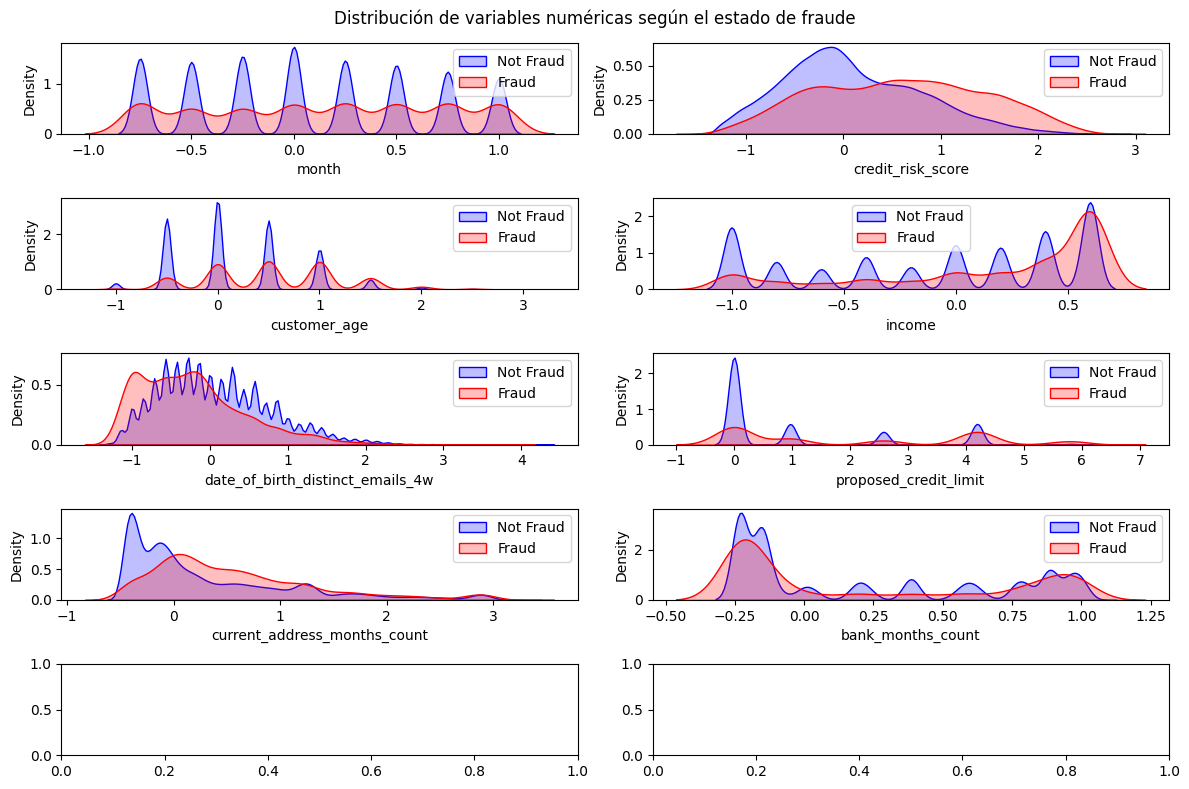

In [65]:
def bivariante_graphs_numerical(df, target_var):
    columns = df.select_dtypes(include=['number']).columns.tolist()  # Solo columnas numéricas
    if target_var in columns:
        columns.remove(target_var)  # Remover la variable objetivo

    num_plots = min(len(columns), 10)  # Máximo 6 gráficos
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8))  # Crear figura 3x2
    axes = axes.flatten()  # Aplanar para fácil iteración

    fig.suptitle('Distribución de variables numéricas según el estado de fraude')

    for i, feature in enumerate(columns[:num_plots]):  # Iterar solo sobre las primeras 6 variables
        ax = axes[i]
        sns.kdeplot(data=df[df[target_var] == 0][feature],fill=True, ax=ax, label='Not Fraud', color='blue')
        sns.kdeplot(data=df[df[target_var] == 1][feature],fill=True, ax=ax, label='Fraud', color='red')
        ax.set_xlabel(feature)
        ax.legend()

    # Eliminar gráficos vacíos si hay menos de 6 variables
    for j in range(i + 1, 6):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

bivariante_graphs_numerical(data_feature_selection[numerical_final_features+[target_var]],target_var)

Finalizado el preprocesamiento de los datos guardamos el dataset con la variables a usar en la creación de los modelos

In [66]:
data_preprocesed = data_feature_selection[final_features+[target_var]].copy()
X = data_preprocesed.drop(columns=[target_var])  # Variables independientes
y = data_preprocesed[target_var]  # Variable objetivo

# Dividir en 80% entrenamiento y 20% prueba, ademas con stratify hace que la proporción se mantenga
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed, stratify=y)

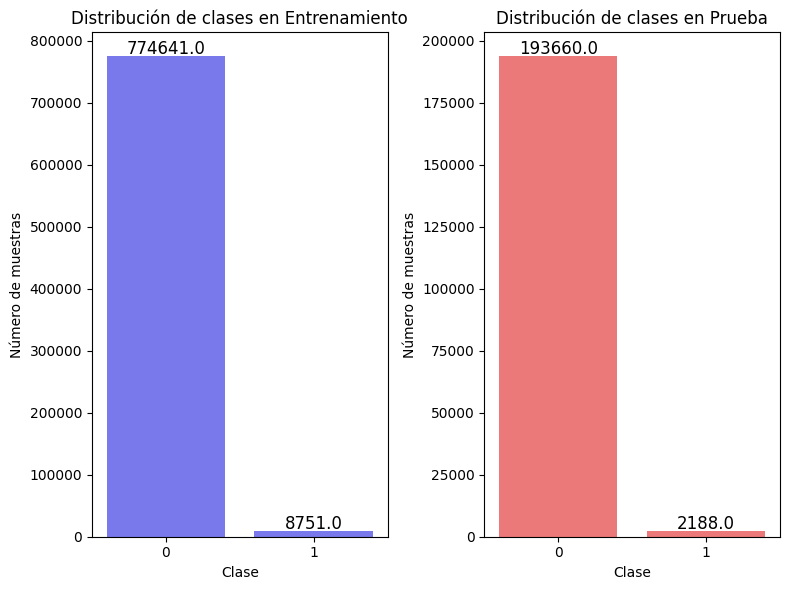

In [67]:
# Crear una figura con dos subgráficas
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# Graficar la distribución de clases en el conjunto de entrenamiento
sns.countplot(x=y_train, color='b', alpha=0.6, ax=ax[0])
ax[0].set_title('Distribución de clases en Entrenamiento')
ax[0].set_xlabel('Clase')
ax[0].set_ylabel('Número de muestras')

# Añadir valores encima de las barras en la gráfica de entrenamiento
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Graficar la distribución de clases en el conjunto de prueba
sns.countplot(x=y_test, color='r', alpha=0.6, ax=ax[1])
ax[1].set_title('Distribución de clases en Prueba')
ax[1].set_xlabel('Clase')
ax[1].set_ylabel('Número de muestras')

# Añadir valores encima de las barras en la gráfica de prueba
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Ajustar el layout para que no se sobrepongan
plt.tight_layout()
plt.show()

In [68]:
# Crear DataFrames de los datos de entrenamiento y prueba
train_data = pd.concat([X_train, y_train], axis=1)
train_data.reset_index(inplace=True,drop=True)
test_data = pd.concat([X_test, y_test], axis=1)
test_data.reset_index(inplace=True,drop=True)

# Guardar los DataFrames en archivos CSV
train_data.to_csv('../../data/processed/train_data.csv', index=False)
test_data.to_csv('../../data/processed/test_data.csv', index=False)
data_preprocesed.to_csv('../../data/processed/preprocesed_data.csv',index=False)
